**INSTRUCTIONS**



1.  The assignment contains four questions. A few bonus questions are mentioned. 
2.   This assignment is due on **6th Feb, 23:59 **(**No Further extensions**).
3.   Assignment must be implemented in Python 3 only.
4.   You are allowed to use libraries for data preprocessing (numpy, pandas etc) and for evaluation metrics, data visualization (matplotlib etc.).
5.   You will be evaluated not just on the overall performance of the model and also on the experimentation with hyper parameters, data prepossessing techniques etc.
6.   The report file must be a well documented jupyter notebook, explaining the experiments you have performed, evaluation metrics and corresponding code. The code must run and be able to reproduce the accuracies, figures/graphs etc.
7.   For all the questions, you must create a train-validation data split and test the hyperparameter tuning on the validation set. Your jupyter notebook must reflect the same.
8.   Any attempts at **plagiarism will be penalized heavily**.
9.   Make sure you run and save your notebooks before submission.
10.  For question 3 of the Decision Trees section, output your model's depth first traversal into ```outputimp.txt``` and submit it along with the ipynb file.
10. Naming convention for the ipynb file is ```<roll_number>_assign1.ipynb```
11. Compress your submission files into a zip file with the naming convention: ```<roll_number>_assign1.zip``` and submit in the portal.

In [ ]:
import pandas as pd
from random import seed 
from random import randrange
from random import randint
import random
import math
from google.colab import drive
drive.mount('/content/drive')
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('/content/drive/My Drive/diamonds.csv', na_values='?',header=None, names = headers) 
data = data.reset_index(drop=True)
data = data.iloc[1:]
data.describe()
finaldata = pd.DataFrame(data, columns=["carat",	"cut","color","clarity","depth","table","price","x","y","z"])
finaldata

Mounted at /content/drive


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58,334,4.2,4.23,2.63
5,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57,2757,5.75,5.76,3.5
53937,0.72,Good,D,SI1,63.1,55,2757,5.69,5.75,3.61
53938,0.7,Very Good,D,SI1,62.8,60,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61,58,2757,6.15,6.12,3.74


#**1) REGRESSION**

Please find the Diamond Price Prediction Data set https://drive.google.com/drive/folders/1qE1tm3Ke3uotTyv6SUqruI09t-AkcwRK?usp=sharing. "description.txt" contains the feature description of data, "diamonds.csv" has the data.



```
# This is formatted as code
```

**KNN Regression [Diamond Price Prediction Dataset]**

1. a) Build a knn regression algorithm [using only python from scratch] to predict the price of diamonds.

In [ ]:
def trainsplit(temp,value,finaldata):
  train = list()
  while(len(train)<value):
    index = random.choice(temp)
    train.append(index)
  return train 
def testsplit(temp,value,finaldata):
  test = list()
  while(len(test)<value):
    index = random.choice(temp)
    test.append(index)
  return test 
def validatesplit(temp,value,finaldata):
  validate = list()
  while(len(validate)<value):
    index = random.choice(temp)
    validate.append(index)
  return validate 

def eucled(list1,list2):
  value = 0
  for i in range(0,len(list1)-1):
    value = value + (list1[i]-list2[i])**2
  value = math.sqrt(value)
  return value  

#converting categorial data
cut_dictionary = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Premium' : 4, 'Ideal' : 5}
clarity_dictionary ={ 'I1' : 1, 'SI2' : 2, 'SI1' : 3, 'VS2' : 4, 'VS1' : 5, 'VVS2' : 6, 'VVS1' : 7 , 'IF' : 8}
colourr_dictionary = {'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1}
finaldata['cut'] = finaldata['cut'].map(cut_dictionary)
finaldata['clarity'] = finaldata['clarity'].map(clarity_dictionary)
finaldata['color'] = finaldata['color'].map(colourr_dictionary)
finaldata = finaldata[['carat','cut','color','clarity','depth','table','x','y','z','price']]
for col in finaldata.columns:
  finaldata[col] = pd.to_numeric(finaldata[col])
#NORMALIZATION
for col in finaldata.columns:
  if(col != "price"):
   column = finaldata[col]
   value = column.max()
   finaldata[col] = finaldata[col]/value
#Spliting data now
temp = finaldata.index.tolist()
train1 = trainsplit(temp,45000,finaldata)  
train = finaldata.loc[train1]
remain1 = finaldata.drop(train1)
print(len(train))
temp = remain1.index.tolist()
test1 = testsplit(temp,2500,remain1)
test = remain1.loc[test1]
remain2 = remain1.drop(test1)
print(len(test))
temp = remain2.index.tolist()
validate = validatesplit(temp,2500,remain2)
validation = remain2.loc[validate]
validation
#handling eucledian
price = []
z = 0
k = ['2','3','5','7','11','16']
predictedprice = []
for i in range(0,len(validation)):
  list1 = validation.iloc[i]
  distance = []
  for j in range(0,len(train)):
    list2 = train.iloc[j]
    dist = eucled(list1,list2)
    price = list2[9]
    distance.append([dist,price])
  distance = sorted(distance, key = lambda x: x[0])
  predict = []
  for i in range(0,len(k)):
   val = k[i]
   val = int(val)
   value = 0
   for j in range (0,val):
    value += (distance[j][1])
   value = value/val
   predict.append(value) 
  predictedprice.append(predict)
  z=z+1
actualprice = []
for i in range(0,len(validation)):
  actualprice.append(validation.iloc[i][9])
print("Done")


45000
1200
Done


In [ ]:
#test
#train
#validate

In [ ]:
import numpy
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(predictedprice)
print(actualprice)
predictedprice1 = []
predictedprice1 = numpy.transpose(predictedprice)
#for i in global_dict:
    #RMSE[i]=mean_squared_error(actual_price, global_dict[i], squared=False)
    #MAE[i]=mean_absolute_error(actual_price, global_dict[i])
    #R2[i]=r2_score(actual_price, global_dict[i])
#print(predictedprice1)
RMSE = []
MAE = []
R2 = []
#print((predictedprice1))
for val in range(0,len(predictedprice1)):
  value = []
  value = predictedprice1[val]
  RMSE.append(mean_squared_error(actualprice,value))
  MAE.append(mean_absolute_error(actualprice,value))
  R2.append(r2_score(actualprice,value))
print(RMSE)
print(MAE)
print(R2)  

[[3027.0, 3076.3333333333335, 3158.0, 3295.1428571428573, 3691.181818181818, 3561.0], [8476.0, 8562.666666666666, 8632.0, 8703.285714285714, 8499.0, 8530.6875], [3694.0, 3713.0, 3945.8, 4329.714285714285, 4962.909090909091, 4916.6875], [16194.5, 15130.0, 15033.6, 14611.142857142857, 14842.454545454546, 14894.625], [1708.0, 1758.0, 1813.0, 1837.4285714285713, 1748.2727272727273, 1530.125], [4022.0, 4428.666666666667, 4042.2, 3831.1428571428573, 4044.2727272727275, 3442.125], [14566.5, 13770.666666666666, 13085.4, 13129.57142857143, 13910.363636363636, 13737.25], [783.5, 1089.3333333333333, 1352.8, 1496.857142857143, 1477.5454545454545, 1409.9375], [8374.5, 8108.0, 7697.0, 7835.285714285715, 7797.181818181818, 7731.5625], [663.0, 706.6666666666666, 764.4, 785.7142857142857, 748.8181818181819, 741.3125], [914.0, 904.6666666666666, 911.2, 912.0, 905.0909090909091, 905.9375], [3141.0, 3090.0, 2608.0, 2339.714285714286, 2175.3636363636365, 2011.125], [5245.5, 5219.333333333333, 5050.6, 5157.

1. b) Do we need to normalise data? [If so Does it make any difference?].


In [ ]:
Yes we need to normalize the data as the values stored in the depth and table part is quite large and might lead to shifting of data towards them. Hence we normalize the data by dividing the column data with the max value of the data.

2. Experiment with different distance measures[Euclidean distance, Manhattan distance, Hamming Distance] to handle categorical attributes.

In [ ]:
finaldata_manh = finaldata
#converting categorial data
cut_dictionary = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Premium' : 4, 'Ideal' : 5}
clarity_dictionary ={ 'I1' : 1, 'SI2' : 2, 'SI1' : 3, 'VS2' : 4, 'VS1' : 5, 'VVS2' : 6, 'VVS1' : 7 , 'IF' : 8}
colourr_dictionary = {'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1}
finaldata_manh['cut'] = finaldata_manh['cut'].map(cut_dictionary)
finaldata_manh['clarity'] = finaldata_manh['clarity'].map(clarity_dictionary)
finaldata_manh['color'] = finaldata_manh['color'].map(colourr_dictionary)
finaldata_manh = finaldata_manh[['carat','cut','color','clarity','depth','table','x','y','z','price']]
for col in finaldata_manh.columns:
  finaldata_manh[col] = pd.to_numeric(finaldata_manh[col])
#NORMALIZATION
for col in finaldata_manh.columns:
  if(col != "price"):
   column = finaldata_manh[col]
   value = column.max()
   finaldata_manh[col] = finaldata_manh[col]/value
finaldata_manh   

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.045908,1.0,0.857143,0.250,0.778481,0.578947,0.367784,0.067572,0.076415,326
2,0.041916,0.8,0.857143,0.375,0.756962,0.642105,0.362197,0.065195,0.072642,326
3,0.045908,0.4,0.857143,0.625,0.720253,0.684211,0.377095,0.069100,0.072642,327
4,0.057884,0.8,0.285714,0.500,0.789873,0.610526,0.391061,0.071817,0.082704,334
5,0.061876,0.4,0.142857,0.250,0.801266,0.610526,0.404097,0.073854,0.086478,335
...,...,...,...,...,...,...,...,...,...,...
53936,0.143713,1.0,1.000000,0.375,0.769620,0.600000,0.535382,0.097793,0.110063,2757
53937,0.143713,0.4,1.000000,0.375,0.798734,0.578947,0.529795,0.097623,0.113522,2757
53938,0.139721,0.6,1.000000,0.375,0.794937,0.631579,0.527002,0.096435,0.111950,2757
53939,0.171657,0.8,0.428571,0.250,0.772152,0.610526,0.572626,0.103905,0.117610,2757


In [ ]:
X=finaldata_manh.iloc[:, :-1].values
Y=finaldata_manh.iloc[:, 9].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train_manh1, X_test_manh, Y_train_manh1, Y_test_manh = train_test_split(X,Y,test_size = 0.1,random_state = 5)
X_train_manh,X_val_manh,Y_train_manh,Y_val_manh = train_test_split(X_train_manh1,Y_train_manh1,test_size = 0.1,random_state = 5)
print(len(X_train_manh))
print(len(X_test_manh))
actualpriceknn = Y_test_manh




43691
5394


In [ ]:
import numpy as np
#def manhattan(X,Y):
# return (np.linalg.norm(X-Y, ord = 1))
actualpriceknnval = Y_val_manh
predictedpriceknn = []
k = [1,3,5,7,11,16]
for i in range(0,len(X_val_manh)):
  distance = []
  values = X_val_manh[i]
  
  distance = np.sum(abs(X_train_manh- X_val_manh[i]), axis=1)
  prices = []
  for val in k:  
   indices = np.argpartition(distance, val)
   tmp = indices[:val]
   price = 0
   for values in tmp:
    price += Y_train_manh[values]
   price = price/val 
   prices.append(price)
  predictedpriceknn.append(prices)      
print(predictedpriceknn)  


[[5723.0, 5516.333333333333, 5359.2, 5533.285714285715, 5650.363636363636, 5614.6875], [7273.0, 7835.666666666667, 7877.6, 8240.714285714286, 8024.454545454545, 7983.5625], [524.0, 591.6666666666666, 619.4, 630.7142857142857, 640.2727272727273, 643.8125], [2596.0, 2447.0, 2461.8, 2461.714285714286, 2495.4545454545455, 2436.3125], [3465.0, 3341.0, 3070.8, 3138.1428571428573, 3333.7272727272725, 3406.0625], [5645.0, 5736.333333333333, 5808.4, 5836.0, 5700.090909090909, 5678.3125], [1007.0, 970.0, 1001.2, 999.2857142857143, 974.1818181818181, 956.0], [675.0, 690.3333333333334, 693.4, 701.1428571428571, 677.0909090909091, 678.125], [802.0, 690.6666666666666, 717.2, 722.7142857142857, 709.3636363636364, 711.8125], [680.0, 630.6666666666666, 687.6, 684.4285714285714, 703.7272727272727, 727.4375], [2913.0, 3017.0, 2872.4, 2893.0, 2969.6363636363635, 2951.75], [612.0, 597.3333333333334, 588.2, 562.1428571428571, 555.4545454545455, 608.25], [2111.0, 2258.0, 2264.4, 2220.285714285714, 2279.36363

In [ ]:
import numpy
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#print(predictedprice)
#print(actualprice)
predictedprice1 = []
predictedprice1 = numpy.transpose(predictedpriceknn)
#for i in global_dict:
    #RMSE[i]=mean_squared_error(actual_price, global_dict[i], squared=False)
    #MAE[i]=mean_absolute_error(actual_price, global_dict[i])
    #R2[i]=r2_score(actual_price, global_dict[i])
#print(predictedprice1)
RMSE = []
MAE = []
R2 = []
#print((predictedprice1))
for val in range(0,len(predictedprice1)):
  value = []
  value = predictedprice1[val]
  RMSE.append(mean_squared_error(actualpriceknnval,value))
  MAE.append(mean_absolute_error(actualpriceknnval,value))
  R2.append(r2_score(actualpriceknnval,value))
print(RMSE)
print(MAE)
print(R2)  

[528527.1460350155, 423799.5828813365, 415701.7060020597, 416638.18401395576, 427717.45047024876, 447913.8599422309]
[355.25890834191557, 329.1077239958805, 324.55719876416066, 327.90389877887304, 332.79056268139686, 344.49506951596294]
[0.9673789486716252, 0.973842804386059, 0.9743426107996206, 0.9742848107461642, 0.9736009909604393, 0.9723544549689072]


In [ ]:
#as we can sell highest R2 is at k = 5 hence we take k = 5 for testing

In [ ]:
import numpy as np
#def manhattan(X,Y):
# return (np.linalg.norm(X-Y, ord = 1))
#actualpriceknnval = Y_val_manh
predictedpriceknn = []
#k = [1,3,5,7,11,16]
for i in range(0,len(X_test_manh)):
  distance = []
  values = X_test_manh[i]
  
  distance = np.sum(abs(X_train_manh- X_test_manh[i]), axis=1)
  prices = []
    
  indices = np.argpartition(distance, 5)
  tmp = indices[:5]
  price = 0
  for values in tmp:
    price += Y_train_manh[values]
  price = price/5 
  prices.append(price)
  predictedpriceknn.append(prices)      
print(predictedpriceknn)  


[[4097.2], [857.2], [4192.0], [989.6], [3500.6], [438.8], [10100.2], [548.8], [463.8], [4581.8], [1700.2], [2489.2], [715.6], [4403.8], [14496.6], [495.0], [608.6], [968.6], [14004.6], [5088.4], [905.2], [922.6], [9670.4], [876.8], [1234.0], [578.8], [967.4], [4777.6], [2994.6], [3539.6], [716.6], [4490.0], [5022.4], [1339.2], [1596.2], [2659.8], [6653.2], [712.2], [10095.8], [3371.2], [4050.2], [801.8], [4426.6], [4357.2], [2803.0], [14890.2], [2746.6], [4287.4], [1066.6], [1367.6], [2862.6], [8062.8], [717.6], [517.2], [5957.4], [8265.6], [2692.4], [5936.8], [8673.4], [2078.0], [3739.6], [4173.4], [469.0], [3369.4], [2859.2], [1660.0], [4285.6], [7329.2], [915.8], [3848.6], [14011.0], [8248.0], [3258.4], [738.0], [2181.2], [4236.2], [7430.8], [17036.4], [15382.0], [1649.8], [584.2], [4822.4], [5902.8], [2070.6], [4443.0], [935.4], [1689.6], [1684.8], [13964.2], [6343.6], [1617.4], [1439.0], [3144.6], [3098.8], [483.4], [952.6], [814.0], [3007.6], [2907.6], [3255.2], [6757.8], [2879.0

In [ ]:
import numpy
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
predictedprice1 = []
R211=[]
#print(predictedprice)
predictedprice1 = predictedpriceknn
print(predictedprice1)
R211.append(r2_score(actualpriceknn,predictedprice1))
#for val in range(0,len(predictedprice1)):
#  value = []
#  value = predictedprice1[val]
#  R2.append(r2_score(actualprice,value))
print(R211)  

[[4097.2], [857.2], [4192.0], [989.6], [3500.6], [438.8], [10100.2], [548.8], [463.8], [4581.8], [1700.2], [2489.2], [715.6], [4403.8], [14496.6], [495.0], [608.6], [968.6], [14004.6], [5088.4], [905.2], [922.6], [9670.4], [876.8], [1234.0], [578.8], [967.4], [4777.6], [2994.6], [3539.6], [716.6], [4490.0], [5022.4], [1339.2], [1596.2], [2659.8], [6653.2], [712.2], [10095.8], [3371.2], [4050.2], [801.8], [4426.6], [4357.2], [2803.0], [14890.2], [2746.6], [4287.4], [1066.6], [1367.6], [2862.6], [8062.8], [717.6], [517.2], [5957.4], [8265.6], [2692.4], [5936.8], [8673.4], [2078.0], [3739.6], [4173.4], [469.0], [3369.4], [2859.2], [1660.0], [4285.6], [7329.2], [915.8], [3848.6], [14011.0], [8248.0], [3258.4], [738.0], [2181.2], [4236.2], [7430.8], [17036.4], [15382.0], [1649.8], [584.2], [4822.4], [5902.8], [2070.6], [4443.0], [935.4], [1689.6], [1684.8], [13964.2], [6343.6], [1617.4], [1439.0], [3144.6], [3098.8], [483.4], [952.6], [814.0], [3007.6], [2907.6], [3255.2], [6757.8], [2879.0

In [ ]:
# show all the experiments
#The above KNN is done using Eucledian distance and Manhattan distance

3. Report Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form.

In [ ]:
#eucledian
result = []
result.append(RMSE)
result.append(MAE)
result.append(R2)
result1 = numpy.transpose(result)
df = pd.DataFrame(numpy.array(result1),columns=['MSE','MAE','R2'])
df
#k = ['2','3','5','7','11','16']
#The row values just denotes that indexes of the list of k. index 0 corresponds to k = 2, index 1 corresponds k = 3, index 2 corresponds k = 5
#index 3 corresponds k = 7, index 4 corresponds k = 11 and index 5 corresponds k = 16

,MSE,MAE,R2
0,484797.933125,356.253750,0.968568
1,486060.068426,352.184722,0.968486
2,451556.070367,339.234833,0.970723
3,459158.435000,344.827143,0.970230
4,520789.031763,365.333182,0.966234
5,576667.641745,385.168125,0.962611


In [ ]:
#manhattan
result = []
result.append(RMSE)
result.append(MAE)
result.append(R2)
result1 = numpy.transpose(result)
df = pd.DataFrame(numpy.array(result1),columns=['MSE','MAE','R2'])
df

,MSE,MAE,R2
0,528527.146035,355.258908,0.967379
1,423799.582881,329.107724,0.973843
2,415701.706002,324.557199,0.974343
3,416638.184014,327.903899,0.974285
4,427717.450470,332.790563,0.973601
5,447913.859942,344.495070,0.972354


4.  a) Choose different K values (k=2,3,5,7,11,16) and experiment. Plot a graph showing R2 score vs k.

[0.9685676630600374, 0.9684858313125569, 0.9707229309754691, 0.9702300244047768, 0.9662341458110271, 0.9626112027729657]


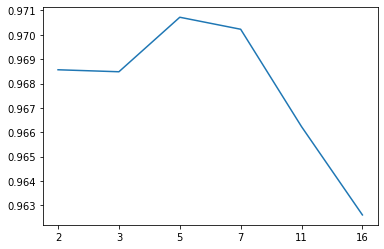

In [ ]:
#at K=5 the R2 is highest that is 0.9740060475191294 hence 5 nearest neighbour will be taken
print(R2)
import matplotlib.pyplot as plt 
plt.plot(k,R2)

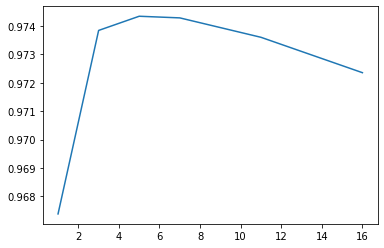

In [ ]:
#manhattan
import matplotlib.pyplot as plt 
plt.plot(k,R2)

In [ ]:
#print(train)
#print(test)
#Training KNN on test data
def eucled(list1,list2):
  value = 0
  for i in range(0,len(list1)-1):
    value = value + (list1[i]-list2[i])**2
  value = math.sqrt(value)
  return value  
predictedprice = []
z = 0
for i in range(0,len(test)):
  list1 = test.iloc[i]
  distance = []
  for j in range(0,len(train)):
    list2 = train.iloc[j]
    dist = eucled(list1,list2)
    price = list2[9]
    distance.append([dist,price])
  distance = sorted(distance, key = lambda x: x[0])
  predict = []
  val = 5
  val = int(val)
  value = 0
  for j in range(0,val):
    value += (distance[j][1])
  value = value/val
  predict.append(value) 
  predictedprice.append(predict)
#  z = z+1
  #print(z)



In [ ]:
import numpy
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
predictedprice1 = []
R211=[]
actualprice1 = []
for i in range(0,len(test)):
  actualprice1.append(test.iloc[i][9])
print(predictedprice)
predictedprice1 = numpy.transpose(predictedprice)
print(predictedprice1)
R211.append(r2_score(actualprice1,predictedprice))
#for val in range(0,len(predictedprice1)):
#  value = []
#  value = predictedprice1[val]
#  R2.append(r2_score(actualprice,value))
print(R211)  
##R2 of test data


In [ ]:
#manhattan test data run is above only below manhattan training cell

4. b) Are the R-squared scores the same? Why / Why not? How do we identify the best K? Suggest a computational procedure, with a logical explanation.

No ,R-squared values are changing as we are changing the number of neighbours. The reason for the change is that as the neighbours change the weighted values of the mean also changes. So the R2 value when highest from a given set of K is our best K. We can also use elbow method in which we plot the graph between K and clusters and the when the optimal K is reached there will be a dip in the curve and all the clusters will be assembling around it.

5. a) Also, report the performance of scikit-learn’s kNN regression algorithm.  

In [ ]:
finaldata
import numpy as np
import pandas as pd


In [ ]:
X=finaldata.iloc[:, :-1].values
Y=finaldata.iloc[:, 9].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.10,random_state = 5)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
classifier = KNeighborsRegressor(n_neighbors = 5)
classifier.fit(X_train,Y_train)

In [ ]:
y_predict = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
R2 = []
MAE=[]
R2.append(r2_score(Y_test,y_predict))
MAE.append(mean_absolute_error(Y_test,y_predict))
print(R2)
print(MAE)


[0.967180893988003]
[374.89432703003337]


5. b) Compare it with the algorithm you built. [ you can use complexities, R2 score etc..]

In [ ]:
R2 score using sklearn is 0.967 and the R2 score of my algorithm is 0.9710 for test data.

6. From the above experiments, what do you think are advantages and disadvantages of the knn regression algorithm?


In [ ]:
Major advantage of KNN is that it is easily to implement and as the number of the data increases the accuracy of the algorithm does not change.
Major disadvantage of KNN is that requires feature scaling and as the dimension increases the time taken to execute the KNN algorithm also increases and also in larger dimension KNN fails drastically.

# **2)** **Linear Regression**

Dataset - same as above (Diamond Price Detection)


2a) Implement a Linear Regression model (from the scratch) taking suitable independent variables from the dataset. 

Report and Calculate the error obtained.


In [ ]:
import pandas as pd
from random import seed 
from random import randrange
from random import randint
import random
import math
from google.colab import drive
drive.mount('/content/drive')
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('/content/drive/My Drive/diamonds.csv', na_values='?',header=None, names = headers) 
data = data.reset_index(drop=True)
data = data.iloc[1:]
data.describe()
finaldata = pd.DataFrame(data, columns=["carat",	"cut","color","clarity","depth","table","price","x","y","z"])
finaldata = finaldata[['carat','cut','color','clarity','depth','table','x','y','z','price']]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#converting categorial data
cut_dictionary = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Premium' : 4, 'Ideal' : 5}
clarity_dictionary ={ 'I1' : 1, 'SI2' : 2, 'SI1' : 3, 'VS2' : 4, 'VS1' : 5, 'VVS2' : 6, 'VVS1' : 7 , 'IF' : 8}
colourr_dictionary = {'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1}
finaldata['cut'] = finaldata['cut'].map(cut_dictionary)
finaldata['clarity'] = finaldata['clarity'].map(clarity_dictionary)
finaldata['color'] = finaldata['color'].map(colourr_dictionary)
finaldata = finaldata[['carat','cut','color','clarity','depth','table','x','y','z','price']]
for col in finaldata.columns:
  finaldata[col] = pd.to_numeric(finaldata[col])
#NORMALIZATION
for col in finaldata.columns:
  if(col != "price"):
   column = finaldata[col]
   value = column.max()
   finaldata[col] = finaldata[col]/value

In [ ]:
X=finaldata.iloc[:, :-1].values
Y=finaldata.iloc[:, 9].values
print(Y)

[ 326  326  327 ... 2757 2757 2757]


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.20,random_state = 5)
#X_train = np.array(X_train)
#Y_train = np.array(Y_train)
#X_test = np.array(X_test)
#Y_test = np.array(Y_test)


In [ ]:
import numpy as np
X_train = X_train.T
Y_train = np.array([Y_train])
X_test = X_test.T
Y_test = np.array([Y_test])
print(Y_train.shape)
print(X_train.shape)


(1, 43152)
(9, 43152)


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def parameters(lengthw):
  w = np.zeros((1,lengthw))
  b = 0
  return w,b
def forwardpropogation(X,w,b):
  z = np.dot(w,X)+b
  return z  
def costfunction(z,y):
  m = y.shape[1]
  J=(1/(2*m))*np.sum(np.square(z-y))
  return J  
def backwardpropogation(X,y,z):
  m = y.shape[1]
  dz = (1/m)*(z-y)
  dw = np.dot(dz,X.T)
  db = np.sum(dz)
  return dw,db  
def gradientdescent(W,b,dw,db,learning_rate):
  W = W - learning_rate*dw
  b = b - learning_rate*db
  return W,b  
costs = []
epochs1 = [] 
y = [] 
pp=[]
def linearregressionmodel(X_train,Y_train,X_test,Y_test,learning_rate,epochs):
  lenw = X_train.shape[0]
  w,b = parameters(lenw)
  nooftrains = Y_train.shape[1]
  nooftests = Y_test.shape[1]
  for i in range(1,epochs+1):
    z = forwardpropogation(X_train,w,b)
    cost = costfunction(z,Y_train)
    dw,db = backwardpropogation(X_train,Y_train,z)
    w,b = gradientdescent(w,b,dw,db,learning_rate)
    costs.append(cost)
    epochs1.append(i)  
    MAE_train = (1/nooftrains)*np.sum(np.abs(z-Y_train))
    R2_train = 1-np.sum((z-Y_train)**2)/np.sum((Y_train-Y_train.mean())**2)
    z_test = forwardpropogation(X_test,w,b) 
    pp.append(z_test)
    cost_test = costfunction(z_test,Y_test)
    y.append(cost_test)
    MAE_test =  (1/nooftests)*np.sum(np.abs(z_test-Y_test))
    R2_test = 1-np.sum((z_test-Y_test)**2)/np.sum((Y_test-Y_test.mean())**2)
    print("Epochs" + str(i)+"/"+str(epochs)+":")
    print("Training cost" + str(cost) + "Testing cost" + str(cost_test))
    print("Training MAE" + str(MAE_train) + "Testing MAE" + str(MAE_test))
    print("Training R2" + " "+str(R2_train) + "Testing R2" + " " + str(R2_test))
#for i in range (1,4001):
#  epochs.append(i)    
#plt.plot(epochs,costs)
#plt.xlabel("Iterations cost")
#plt.ylabel("Training cost")
#plt.title("learning rate"+str(learning_rate))
#plt.show() 
linearregressionmodel(X_train,Y_train,X_test,Y_test,0.1,100000)  




Streaming output truncated to the last 5000 lines.
Epochs98751/100000:
Training cost746793.417475261Testing cost733726.1397627837
Training MAE822.2238448854783Testing MAE813.5304948523698
Training R2 0.9064169869688266Testing R2 0.9067489590539998
Epochs98752/100000:
Training cost746793.302966871Testing cost733726.0086750957
Training MAE822.2235383735042Testing MAE813.5301927523842
Training R2 0.9064170013182302Testing R2 0.9067489757142531
Epochs98753/100000:
Training cost746793.1884629189Testing cost733725.8775920394
Training MAE822.2232318682182Testing MAE813.5298906589337
Training R2 0.9064170156670777Testing R2 0.9067489923739177
Epochs98754/100000:
Training cost746793.0739634042Testing cost733725.7465136134
Training MAE822.2229253696202Testing MAE813.5295885720174
Training R2 0.9064170300153691Testing R2 0.9067490090329939
Epochs98755/100000:
Training cost746792.9594683269Testing cost733725.6154398181
Training MAE822.2226188777098Testing MAE813.5292864916355
Training R2 0.9064170

In [ ]:
#print(pp)

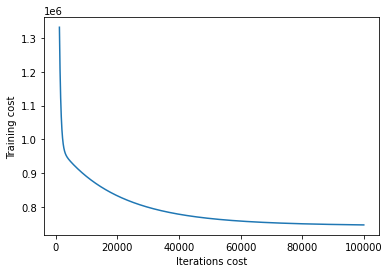

In [ ]:

#print(epochs1)
#print(y)
#print(costs)
plt.plot(epochs1[1200:100000],costs[1200:100000])
plt.xlabel("Iterations cost")
plt.ylabel("Training cost")
plt.show() 


2b) What are the best suitable features you used to predict the price of the dataset and Why?

Idea: Use Correlation to get the suitable features and Report the values accordingly.

In [ ]:
finaldata
finaldata.corr(method='pearson')

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,-0.134967,-0.291437,-0.352841,0.028224,0.181618,0.975094,0.951722,0.953387,0.921591
cut,-0.134967,1.000000,0.020519,0.189175,-0.218055,-0.433405,-0.125565,-0.121462,-0.149323,-0.053491
color,-0.291437,0.020519,1.000000,-0.025631,-0.047279,-0.026465,-0.270287,-0.263584,-0.268227,-0.172511
clarity,-0.352841,0.189175,-0.025631,1.000000,-0.067384,-0.160327,-0.371999,-0.358420,-0.366952,-0.146800
depth,0.028224,-0.218055,-0.047279,-0.067384,1.000000,-0.295779,-0.025289,-0.029341,0.094924,-0.010647
table,0.181618,-0.433405,-0.026465,-0.160327,-0.295779,1.000000,0.195344,0.183760,0.150929,0.127134
x,0.975094,-0.125565,-0.270287,-0.371999,-0.025289,0.195344,1.000000,0.974701,0.970772,0.884435
y,0.951722,-0.121462,-0.263584,-0.358420,-0.029341,0.183760,0.974701,1.000000,0.952006,0.865421
z,0.953387,-0.149323,-0.268227,-0.366952,0.094924,0.150929,0.970772,0.952006,1.000000,0.861249
price,0.921591,-0.053491,-0.172511,-0.146800,-0.010647,0.127134,0.884435,0.865421,0.861249,1.000000


In [ ]:
finaldata.corr(method='kendall')

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,-0.102856,-0.181996,-0.277150,0.019727,0.139149,0.960602,0.957371,0.951233,0.834105
cut,-0.102856,1.000000,0.013998,0.152672,-0.151699,-0.387971,-0.091027,-0.091484,-0.109237,-0.068220
color,-0.181996,0.013998,1.000000,-0.023977,-0.035845,-0.021381,-0.177698,-0.177628,-0.181715,-0.106768
clarity,-0.277150,0.152672,-0.023977,1.000000,-0.055611,-0.124632,-0.272647,-0.268238,-0.275069,-0.147648
depth,0.019727,-0.151699,-0.035845,-0.055611,1.000000,-0.178682,-0.018134,-0.019530,0.070946,0.005750
table,0.139149,-0.387971,-0.021381,-0.124632,-0.178682,1.000000,0.143546,0.138722,0.112482,0.121704
x,0.960602,-0.091027,-0.177698,-0.272647,-0.018134,0.143546,1.000000,0.968242,0.912580,0.830555
y,0.957371,-0.091484,-0.177628,-0.268238,-0.019530,0.138722,0.968242,1.000000,0.911314,0.829333
z,0.951233,-0.109237,-0.181715,-0.275069,0.070946,0.112482,0.912580,0.911314,1.000000,0.819293
price,0.834105,-0.068220,-0.106768,-0.147648,0.005750,0.121704,0.830555,0.829333,0.819293,1.000000


Explanation for 2b) - We will not be taking those values which have minimum correlation with the price column.Hence we won't be taking  table and depth while training our model.


In [ ]:
#LINEAR REGRESSION AFTER REMOVING SOME VALUES LIKE DEPTH AND TABLE
finaldata1 = finaldata[["carat","cut","color","clarity","x","y","z","price"]]
finaldata1
X_new=finaldata1.iloc[:, :-1].values
Y_new=finaldata1.iloc[:, 7].values
print(Y_new)

[ 326  326  327 ... 2757 2757 2757]


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X_new,Y_new,test_size = 0.20,random_state = 5)
X_train_new = np.array(X_train_new)
Y_train_new = np.array(Y_train_new)
X_test_new = np.array(X_test_new)
Y_test_new = np.array(Y_test_new)

In [ ]:
import numpy as np
X_train_new = X_train_new.T
Y_train_new = np.array([Y_train_new])
X_test_new = X_test_new.T
Y_test_new = np.array([Y_test_new])
print(Y_train_new.shape)
print(X_train_new.shape)


(1, 43152)
(7, 43152)


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def parameters1(lengthw1):
  w1 = np.zeros((1,lengthw))
  b1 = 0
  return w1,b1
def forwardpropogation1(X1,w1,b1):
  z1 = np.dot(w1,X1)+b1
  return z1  
def costfunction1(z1,y1):
  m1 = y1.shape[1]
  J1=(1/(2*m1))*np.sum(np.square(z1-y1))
  return J1  
def backwardpropogation1(X1,y1,z1):
  m1 = y1.shape[1]
  dz1 = (1/m1)*(z1-y1)
  dw1 = np.dot(dz1,X1.T)
  db1 = np.sum(dz1)
  return dw1,db1  
def gradientdescent1(W1,b1,dw1,db1,learning_rate1):
  W1 = W1 - learning_rate1*dw1
  b1 = b1 - learning_rate1*db1
  return W1,b1  
costs1 = []
epochs11 = [] 
y1 = [] 
def linearregressionmodel1(X_train_new,Y_train_new,X_test_new,Y_test_new,learning_rate1,epochs1):
  lenw1 = X_train_new.shape[0]
  w1,b1 = parameters(lenw1)
  nooftrains1 = Y_train_new.shape[1]
  nooftests1 = Y_test_new.shape[1]
  for i in range(1,epochs1+1):
    z1 = forwardpropogation1(X_train_new,w1,b1)
    cost1 = costfunction1(z1,Y_train_new)
    dw1,db1 = backwardpropogation1(X_train_new,Y_train_new,z1)
    w1,b1 = gradientdescent1(w1,b1,dw1,db1,learning_rate1)
    costs1.append(cost1)
    epochs11.append(i)  
    MAE_train_new = (1/nooftrains1)*np.sum(np.abs(z1-Y_train_new))
    R2_train_new = 1-np.sum((z1-Y_train_new)**2)/np.sum((Y_train_new-Y_train_new.mean())**2)
    z_test_new = forwardpropogation1(X_test_new,w1,b1) 
    cost_test_new = costfunction1(z_test_new,Y_test_new)
    y1.append(cost_test_new)
    MAE_test_new =  (1/nooftests1)*np.sum(np.abs(z_test_new-Y_test_new))
    R2_test_new = 1-np.sum((z_test_new-Y_test_new)**2)/np.sum((Y_test_new-Y_test_new.mean())**2)
    print("Epochs" + str(i)+"/"+str(epochs1)+":")
    print("Training cost" + str(cost1) + "Testing cost" + str(cost_test_new))
    print("Training MAE" + str(MAE_train_new) + "Testing MAE" + str(MAE_test_new))
    print("Training R2" + " "+str(R2_train_new) + "Testing R2" + " " + str(R2_test_new))

#for i in range (1,4001):
#  epochs.append(i)    
#plt.plot(epochs,costs)
#plt.xlabel("Iterations cost")
#plt.ylabel("Training cost")
#plt.title("learning rate"+str(learning_rate))
#plt.show() 
linearregressionmodel1(X_train_new,Y_train_new,X_test_new,Y_test_new,0.1,100000)  




Streaming output truncated to the last 5000 lines.
Epochs98751/100000:
Training cost749429.5258640604Testing cost736620.9437343653
Training MAE824.3400016344314Testing MAE815.9244875354736
Training R2 0.9060866480023496Testing R2 0.9063810513714796
Epochs98752/100000:
Training cost749429.4274141146Testing cost736620.8310824089
Training MAE824.3397032719458Testing MAE815.9241887837076
Training R2 0.9060866603394194Testing R2 0.9063810656886909
Epochs98753/100000:
Training cost749429.328968651Testing cost736620.718435132
Training MAE824.3394049164284Testing MAE815.9238900389314
Training R2 0.9060866726759276Testing R2 0.9063810800053075
Epochs98754/100000:
Training cost749429.2305276699Testing cost736620.6057925335
Training MAE824.3391065678794Testing MAE815.9235913011448
Training R2 0.9060866850118741Testing R2 0.9063810943213295
Epochs98755/100000:
Training cost749429.1320911706Testing cost736620.493154614
Training MAE824.3388082262987Testing MAE815.9232925703477
Training R2 0.90608669

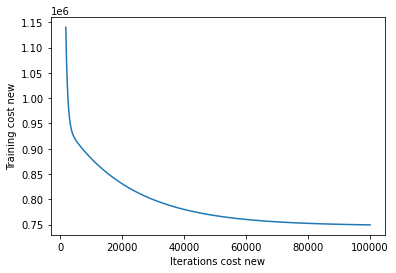

In [ ]:

#print(epochs11)
#print(y1)
#print(costs1)
plt.plot(epochs11[1800:100000],costs1[1800:100000])

plt.xlabel("Iterations cost new")
plt.ylabel("Training cost new")
plt.show() 


In [ ]:
#As we can see the MAE slightly varies and increases a bit when we remove the columns which are less corelated with the price. 
#MAE when we take full columns is 813.41 and we remove 2 columns it increases to 814.17. Hence there is little to no change in the efficiency 
#ALSO R2 value is nearly same in both. When not applying coorelation the R2 is 0.9065 and after coorelation R2 value is 0.9063


2c) Use the module Linear Regression from sklearn to predict the price of diamonds(considering the same attributes as before) and compare the result obtained with the above. 


In [ ]:

import numpy as np
import pandas as pd
import sklearn


In [ ]:
import numpy as np
from sklearn import linear_model
X_test_new
Y_test_new
linear_regression = linear_model.LinearRegression()
model = linear_regression.fit(X_train_new.T,Y_train_new.T)
predictionprice = linear_regression.predict(X_test_new.T)



In [ ]:
predictionprice.shape

(10788, 1)

In [ ]:
MAE_new_sklearn = (1/Y_test_new.shape[1])*np.sum(np.abs(predictionprice-Y_test_new.T))
R2 = r2_score(predictionprice,Y_test_new.T)
print(R2)

0.8953895482560092


In [ ]:
MAE_new_sklearn

800.9875760765832

In [ ]:
#We can see our model MAE value is big hence we re-train the model with less learning rate. After re-training my model the new MAE becomes 814.17 for test data.

2d) Now, using the whole dataset, predict the price of the Diamonds using the module of Linear Regression from sklearn. Report the changes you have observed compared to before? Adding extra features did it make the prediction better or worse.Comment? 


In [ ]:
X_train_manh
Y_train_manh
X_test_manh
Y_test_manh

import numpy as np
import pandas as pd
import sklearn

In [ ]:
import numpy as np
from sklearn import linear_model
#X_test_new
#Y_test_new
print(len(Y_test_manh))
linear_regression = linear_model.LinearRegression()
model = linear_regression.fit(X_train_manh,Y_train_manh)
predictionprice_LR = linear_regression.predict(X_test_manh)
print(len(predictionprice_LR))



5394
5394


In [ ]:

R2 = r2_score(predictionprice_LR,Y_test_manh.T)

R2

0.8968276592050453

2e) Now, compare the algorithms KNN regression and Linear Regression. What are the differences you have observed? Which is better and why. Your statements should be backed up with statistics. 


Explanation - Looking at the MAE value we can say that the Linear Regression works better on any number of iterations. Also Linear Regression is faster than KNN as KNN takes a lot of time as we increase the validation size for training.
KNN scratch model took 4 hours to train whereas my 100000 epochs linear regression only took 13 mins to train, so Linear Regression is a bit fast. Also KNN is not suitable for a large number of dimensions as curse of dimensionality comes into picture in case of KNN. Also KNN can only output labels whereas Linear Regression shows the confidence levels of its prediction.

2f) Plot the predicted values from KNN regression, Linear Regression and Actual Diamond Price.


[   0    1    2 ... 5391 5392 5393]


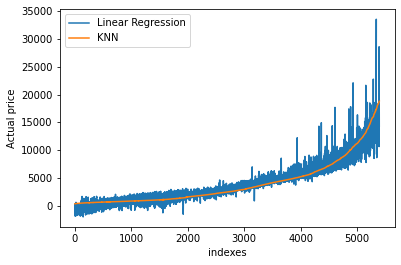

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
#Y_test
#y_predict_knn

predictionprice_LR = np.array(predictionprice_LR)
#y_predict_knn = y_predict_knn.T
#print(len(y_predict_knn))
predictedpriceknn1 = np.array(predictedpriceknn)
predictedpriceknn1 = predictedpriceknn1.flatten()
#indexes = []
#print(Y_test)
Y_test_manh = Y_test_manh.T
indexes = np.argsort(Y_test_manh)
print(indexes)
Y_test_manh = Y_test_manh[indexes]
predictionprice_LR = predictionprice_LR[indexes]
predictedpriceknn1 = predictedpriceknn1[indexes]
plt.plot(indexes,predictionprice_LR,label = "Linear Regression")
plt.plot(indexes,Y_test_manh,label = "KNN")
plt.xlabel("indexes")
plt.ylabel("Actual price")
plt.legend()
plt.show()

#**KNN Classifier**

In this problem you are required to train, test and validate a K-Nearest Neighbor Classifier on the famous CIFAR-10 dataset. The next few cells will guide you through the process. Follow along...

Next implement the function to predict labels. Again go back to the KNearestNeighbor class cell. Your function will be called as below

In [ ]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import os


from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Download the dataset
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz

--2021-02-08 09:55:21--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  16.3MB/s    in 11s     

2021-02-08 09:55:33 (14.5 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [ ]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))
  
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


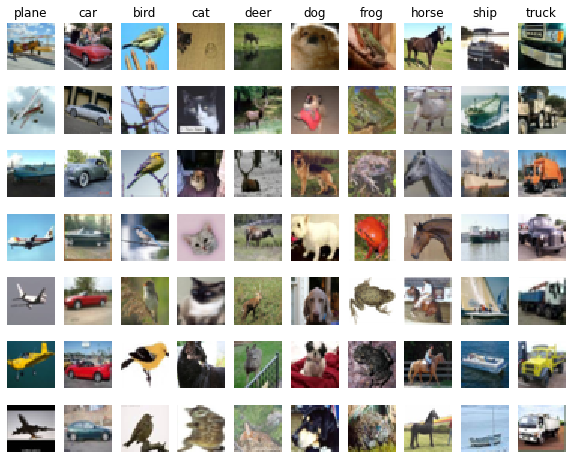

In [ ]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [ ]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In the next cell you are going to implement the main KNearestNeighbor class and keep adding functions to it as and when required in the subsequent steps.

In [ ]:
# You will keep coming back to this cell to add more functions as and when
# required. Right now it is very simple!
import time
class KNearestNeighbor(object):
    """ a kNN classifier with L2 distance """
    def __init__(self):
        pass
    def train(self,X_train1,y_train1):
      self.X_train = X_train1
      self.y_train = y_train1 
    def test(self,X_test1,y_test1):
      self.X_test = X_test1
      self.y_test = y_test1    
    def compute_distances_two_loops(self,X_test):
      traindistances = X_train.shape[0]
      testdistances = self.X_test.shape[0]
      calculateddistance = np.zeros((testdistances,traindistances))
      for i in range(testdistances):
        for j in range(traindistances):
          calculateddistance[i][j] = np.sqrt(np.sum((X_test[i]-self.X_train[j])**2))
      return calculateddistance   
    def predict_labels(self,dists,k):
      testsize = dists.shape[0]
      predictedprice = []
      predictedprice = np.zeros(testsize)
      for i in range(testsize):
        predict = []
        predict = self.y_train[np.argsort(dists[i])][:k]
        tot = np.bincount(predict)
        sot = np.argmax(tot)
        predictedprice[i] = sot
      return predictedprice 
    def compute_one_loop(self,X_test):
      traindistances1 = self.X_train.shape[0]
      testdistances1 = X_test.shape[0]
      calculateddistance1 = np.zeros((testdistances1,traindistances1))
      for i in range(testdistances1):
        calculateddistance1[i] = np.sqrt(np.sum((X_test[i] - self.X_train)**2, axis=1))
      return calculateddistance1
    def compute_zero_loop(self,X_test):
      traindistances0 = self.X_train.shape[0]
      testdistances0 = X_test.shape[0]
      calculateddistance0 = np.zeros((testdistances0,traindistances0))
      calculateddistance0 = np.sqrt((X_test**2).sum(axis=1, keepdims=True) + (self.X_train**2).sum(axis=1) - 2 * X_test.dot(self.X_train.T))
      return calculateddistance0          


Go back to KNearestNeighbor class and add a method to train the classifier. Your function will be called as below. In KNN classifier, this step is a simple memorization of the training data.

In [ ]:
# Make sure to add train() in the classifier class before executing this cell
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
classifier.test(X_test,y_test)
timedouble = []
timesingle = [] 
timezero = []

Go back to KNearestNeighbor class and add a method to compute distances between each pair of test image and train image. You can use two loops to do this. Remember we are using standard L-2 distance metric. Precisely your method should return a distance matrix($D$) where $D(i,j)$ = **L-2** distance between the $i^{th}$ test image and the $j^{th}$ train image. Your function will be called as below

In [ ]:
# Make sure to add compute_distances_two_loops() in the classifier class 
# before executing this cell
start = time.time()
dists = classifier.compute_distances_two_loops(X_test)
#print(dists.shape)
#print(dists)

Next implement the function to predict labels. Again go back to the KNearestNeighbor class cell. Your function will be called as below

In [ ]:
# Make sure to add predict_labels() in the classifier class 
# before executing this cell
y_test_pred = classifier.predict_labels(dists, k=1)
#print(y_test_pred)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
endtime = time.time()-start
timedouble.append(endtime)
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))


Got 137 / 500 correct => accuracy: 0.274000


In [ ]:
# Use this cell to compute accuracies for k = 3, 5, 7
#for k = 3
y_test_pred3 = classifier.predict_labels(dists, k=3)
#print(y_test_pred3)
num_correct3 = np.sum(y_test_pred3 == y_test)
accuracy3 = float(num_correct3) / num_test
endtime = time.time()-start
timedouble.append(endtime)
print('Got %d / %d correct => accuracy: %f' % (num_correct3, num_test, accuracy3))

Got 136 / 500 correct => accuracy: 0.272000


In [ ]:
#for k = 5
y_test_pred5 = classifier.predict_labels(dists, k=5)

# Compute and print the fraction of correctly predicted examples
num_correct5 = np.sum(y_test_pred5 == y_test)
accuracy5 = float(num_correct5) / num_test
endtime = time.time()-start
timedouble.append(endtime)
print('Got %d / %d correct => accuracy: %f' % (num_correct5, num_test, accuracy5))

Got 139 / 500 correct => accuracy: 0.278000


In [ ]:
#for k = 7
y_test_pred7 = classifier.predict_labels(dists, k=7)

# Compute and print the fraction of correctly predicted examples
num_correct7 = np.sum(y_test_pred7 == y_test)
accuracy7 = float(num_correct7) / num_test
endtime = time.time()-start
timedouble.append(endtime)
print('Got %d / %d correct => accuracy: %f' % (num_correct7, num_test, accuracy7))

Got 137 / 500 correct => accuracy: 0.274000


In [ ]:
#print(timedouble)
timedouble = timedouble
print(timedouble)

[38.08586382865906, 39.589985370635986, 37.797762870788574, 37.76059579849243]


Now we have a basic classifier ready but it is extremely inefficient. In Machine Learning writing vectorised code is one of the most important skills. 

Now you have to again go back to the KNearestNeighbor class cell and add functions to compute the distance matrix using:
1.   single loop
2.   no loops

From here onwards we won't do as much hand holding as done before. You are expected to write all the code from scratch



In [ ]:
# Use this cell to call the functions
#for single loop
import time
starttime1 = time.time()
distssingle = classifier.compute_one_loop(X_test)
y_test_pred = classifier.predict_labels(distssingle, k=1)
#print(y_test_pred)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))
endtime11 = time.time()-starttime1
y_test_pred3 = classifier.predict_labels(distssingle, k=3)
#print(y_test_pred3)
num_correct3 = np.sum(y_test_pred3 == y_test)
accuracy3 = float(num_correct3) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct3, num_test, accuracy3))
endtime13 = time.time()-starttime1
y_test_pred5 = classifier.predict_labels(distssingle, k=5)

# Compute and print the fraction of correctly predicted examples
num_correct5 = np.sum(y_test_pred5 == y_test)
accuracy5 = float(num_correct5) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct5, num_test, accuracy5))
endtime15 = time.time()-starttime1
y_test_pred7 = classifier.predict_labels(distssingle, k=7)

# Compute and print the fraction of correctly predicted examples
num_correct7 = np.sum(y_test_pred7 == y_test)
accuracy7 = float(num_correct7) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct7, num_test, accuracy7))
endtime17 = time.time()-starttime1
timesingle.append(endtime11)
timesingle.append(endtime13)
timesingle.append(endtime15)
timesingle.append(endtime17)



Got 137 / 500 correct => accuracy: 0.274000
Got 136 / 500 correct => accuracy: 0.272000
Got 139 / 500 correct => accuracy: 0.278000
Got 137 / 500 correct => accuracy: 0.274000


In [ ]:
print(timesingle)

[28.661298274993896, 28.87032198905945, 29.07950258255005, 29.28861904144287]


In [ ]:
#for zero loop
import time
starttime0 = time.time()
distszero = classifier.compute_zero_loop(X_test)
y_test_pred = classifier.predict_labels(distszero, k=1)
#print(y_test_pred)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))
endtime01 = time.time()-starttime0
y_test_pred3 = classifier.predict_labels(distszero, k=3)
#print(y_test_pred3)
num_correct3 = np.sum(y_test_pred3 == y_test)
accuracy3 = float(num_correct3) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct3, num_test, accuracy3))
endtime03 = time.time()-starttime0
y_test_pred5 = classifier.predict_labels(distszero, k=5)

# Compute and print the fraction of correctly predicted examples
num_correct5 = np.sum(y_test_pred5 == y_test)
accuracy5 = float(num_correct5) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct5, num_test, accuracy5))
endtime05 = time.time()-starttime0
y_test_pred7 = classifier.predict_labels(distszero, k=7)

# Compute and print the fraction of correctly predicted examples
num_correct7 = np.sum(y_test_pred7 == y_test)
accuracy7 = float(num_correct7) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct7, num_test, accuracy7))
endtime07 = time.time()-starttime0
timezero.append(endtime01)
timezero.append(endtime03)
timezero.append(endtime05)
timezero.append(endtime07)

Got 137 / 500 correct => accuracy: 0.274000
Got 136 / 500 correct => accuracy: 0.272000
Got 139 / 500 correct => accuracy: 0.278000
Got 137 / 500 correct => accuracy: 0.274000


Next, you are required to tabulate the time taken to compute the distance matrix using each of the three above methods implemented for k = 1, 3, 5, 7.

In [ ]:
# Use this cell to present your timing results for computing distance matrix
import numpy
import pandas as pd
result = []
result.append(timedouble)
result.append(timesingle)
result.append(timezero)
result1 = numpy.transpose(result)
df = pd.DataFrame(numpy.array(result1),columns=['2 loop','1 loop','0 loop'])
df
#Row0 stands for k = 1, Row1 stands for k = 3, Row2 stands for k = 5, Row3 stands for k=7

,2 loop,1 loop,0 loop
0,38.085864,28.758976,0.923050
1,39.589985,28.973125,1.132431
2,37.797763,29.181951,1.343897
3,37.760596,29.389418,1.553632


As you can see that in KNN algorithm it is important to tune the hyperparameter K. We will do this using Cross Validation Leave One Out approach. The idea is to split the train set into few folds(here we recommend you to set the fold number to 5). Then, for each value of K, we leave one of these folds out to evaluate performance but use the others to train. Repeat this by leaving each fold out once. You will get 5 accuracies in this case, one for leaving out each fold. Depending on the average accuracy decide on the optimal value of K. Report the same. We also expect you to present plots showing the average accuracy and standard deviation for each value of K.

In [ ]:
# Use this cell to implement Cross Validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=None, shuffle=False)
accuracies = []
K = ['1','3','5','7']
K = list(map(int, K)) 
classifier = KNearestNeighbor()
for val in K:
  accu = []
  for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    classifier.train(X_train_fold,y_train_fold)
    distances_fold = classifier.compute_zero_loop(X_test_fold)
    #print(distances_fold)
    y_test_pred_fold = classifier.predict_labels(distances_fold, val)
    #print(y_test_pred_fold)
    num_correct = np.sum(y_test_pred_fold == y_test_fold)
    accuracy = float(num_correct) / 1000
    accu.append(accuracy)
  accuracies.append(accu) 
finalstandarddeviation = np.std(accuracies,axis = 1)
#print(accuracies)  
finalaccu = []
for val in accuracies:
  finalaccu.append(sum(val)/len(val))
print(finalaccu) 
print(finalstandarddeviation)    



[0.2656, 0.2496, 0.2732, 0.27440000000000003]
[0.00688767 0.00993177 0.01505191 0.00926499]


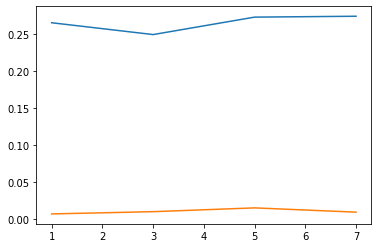

In [ ]:
import matplotlib.pyplot as plt
plt.plot(K,finalaccu)
plt.plot(K,finalstandarddeviation)
#orange line is standard deviation
#blue line is accuracies
#K=7 has the highest accuracy

In this last part of the notebook you are expected to do the following and present appropriate reports/results:

1. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels in all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
2. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels at that position from all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
3. What is the time complexity of training using KNN classifier? What is the time complexity while testing? Is KNN a linear classifier or can it learn any boundary?
4. Bonus: Explore what image features you can use to better the performance of KNN classifier.




In [ ]:
# You will keep coming back to this cell to add more functions as and when
# required. Right now it is very simple!
import time
class KNearestNeighbor(object):
    """ a kNN classifier with L2 distance """
    def __init__(self):
        pass
    def train(self,X_train1,y_train1):
      self.X_train = X_train1
      self.y_train = y_train1 
    def test(self,X_test1,y_test1):
      self.X_test = X_test1
      self.y_test = y_test1    
    def compute_distances_two_loops(self,X_test):
      traindistances = X_train.shape[0]
      testdistances = self.X_test.shape[0]
      calculateddistance = np.zeros((testdistances,traindistances))
      for i in range(testdistances):
        for j in range(traindistances):
          calculateddistance[i][j] = np.sqrt(np.sum((X_test[i]-self.X_train[j])**2))
      return calculateddistance   
    def predict_labels(self,dists,k):
      testsize = dists.shape[0]
      predictedprice = []
      predictedprice = np.zeros(testsize)
      for i in range(testsize):
        predict = []
        predict = self.y_train[np.argsort(dists[i])][:k]
        tot = np.bincount(predict)
        sot = np.argmax(tot)
        predictedprice[i] = sot
      return predictedprice 
    def compute_one_loop(self,X_test):
      traindistances1 = self.X_train.shape[0]
      testdistances1 = X_test.shape[0]
      calculateddistance1 = np.zeros((testdistances1,traindistances1))
      for i in range(testdistances1):
        calculateddistance1[i] = np.sqrt(np.sum((X_test[i] - self.X_train)**2, axis=1))
      return calculateddistance1
    def compute_zero_loop(self,X_test):
      traindistances0 = self.X_train.shape[0]
      testdistances0 = X_test.shape[0]
      calculateddistance0 = np.zeros((testdistances0,traindistances0))
      calculateddistance0 = np.sqrt((X_test**2).sum(axis=1, keepdims=True) + (self.X_train**2).sum(axis=1) - 2 * X_test.dot(self.X_train.T))
      return calculateddistance0          


In [ ]:
#answer of 1

X_new11 = X_train.mean()
X_train = X_train - X_new11
X_test11 = X_test.mean()
X_test = X_test-X_test11 
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)


In [ ]:

import time
starttime0 = time.time()
distszero = classifier.compute_zero_loop(X_test)
y_test_pred = classifier.predict_labels(distszero, k=1)
#print(y_test_pred)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))
endtime01 = time.time()-starttime0
y_test_pred3 = classifier.predict_labels(distszero, k=3)
#print(y_test_pred3)
num_correct3 = np.sum(y_test_pred3 == y_test)
accuracy3 = float(num_correct3) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct3, num_test, accuracy3))
endtime03 = time.time()-starttime0
y_test_pred5 = classifier.predict_labels(distszero, k=5)

# Compute and print the fraction of correctly predicted examples
num_correct5 = np.sum(y_test_pred5 == y_test)
accuracy5 = float(num_correct5) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct5, num_test, accuracy5))
endtime05 = time.time()-starttime0
y_test_pred7 = classifier.predict_labels(distszero, k=7)

# Compute and print the fraction of correctly predicted examples
num_correct7 = np.sum(y_test_pred7 == y_test)
accuracy7 = float(num_correct7) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct7, num_test, accuracy7))
endtime07 = time.time()-starttime0
#timezero.append(endtime01)
#timezero.append(endtime03)
#timezero.append(endtime05)
#timezero.append(endtime07)

Got 133 / 500 correct => accuracy: 0.266000
Got 140 / 500 correct => accuracy: 0.280000
Got 140 / 500 correct => accuracy: 0.280000
Got 134 / 500 correct => accuracy: 0.268000


In [ ]:
#slight change in accuracy in removing the mean as the mean is substracted from all the points hence the final distances will be taken from the depreciated 
#points and by deleting the mean a type of normalization is happening. Hence the accuracy is improved slightly

In [ ]:
#answer 2
X_new11 = X_train.mean(axis = 0)
X_train = X_train - X_new11
X_test11 = X_test.mean(axis = 0)
X_test = X_test-X_test11 
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

In [ ]:

import time
starttime0 = time.time()
distszero = classifier.compute_zero_loop(X_test)
y_test_pred = classifier.predict_labels(distszero, k=1)
#print(y_test_pred)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))
endtime01 = time.time()-starttime0
y_test_pred3 = classifier.predict_labels(distszero, k=3)
#print(y_test_pred3)
num_correct3 = np.sum(y_test_pred3 == y_test)
accuracy3 = float(num_correct3) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct3, num_test, accuracy3))
endtime03 = time.time()-starttime0
y_test_pred5 = classifier.predict_labels(distszero, k=5)

# Compute and print the fraction of correctly predicted examples
num_correct5 = np.sum(y_test_pred5 == y_test)
accuracy5 = float(num_correct5) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct5, num_test, accuracy5))
endtime05 = time.time()-starttime0
y_test_pred7 = classifier.predict_labels(distszero, k=7)

# Compute and print the fraction of correctly predicted examples
num_correct7 = np.sum(y_test_pred7 == y_test)
accuracy7 = float(num_correct7) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct7, num_test, accuracy7))
endtime07 = time.time()-starttime0
#timezero.append(endtime01)
#timezero.append(endtime03)
#timezero.append(endtime05)
#timezero.append(endtime07)

Got 135 / 500 correct => accuracy: 0.270000
Got 129 / 500 correct => accuracy: 0.258000
Got 133 / 500 correct => accuracy: 0.266000
Got 132 / 500 correct => accuracy: 0.264000


In [ ]:
#Slight change in frequencies again. As the mean is depreciated from the points there is a type of normalization happening so the values are getting a bit 
#normalized and hence the accuracy is changing.

Answer 3: Brute force approach requires O(ndk) as we don't know for what K we might be getting the right answer.
Initialize selected i=0 for all observations i in the training set
For j=1to k: Loop through all training set observations and compute the distance d between the selected training set observation and the new observation. Select the index i with the smallest d value for which selected i=0. Select this observation by setting selected i=1
Return the k selected indices
For each iterate in the second step, we compute the distance between the new observation and each training set observation, requiring O(nd) work for an iteration and therefore O(ndk) work overall.
While testing time it's time complexity is O(nd) as we don't need the loop over K as we have already found the best K.
Also KNN is a non-linear classifier unlike support vector machine as consider some dense region of positive points. The decision boundary to classify test instances around those points will look like a curve - not a hyperplane.

# **Decision Trees**

The Wisconsin Breast Cancer Dataset(WBCD) can be found here(https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

This dataset describes the characteristics of the cell nuclei of various patients with and without breast cancer. The task is to classify a decision tree to predict if a patient has a benign or a malignant tumour based on these features.

Attribute Information:
```
#  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```



In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('/content/drive/My Drive/breast-cancer-wisconsin.data', na_values='?',header=None, names = headers) 
data = data.reset_index(drop=True)
data = data.fillna(0)
data.describe()
print(data)

Mounted at /content/drive
          ID  CT  UCSize  UCShape  MA  ...    BN  BC  NN  Mitoses  Diagnosis
0    1000025   5       1        1   1  ...   1.0   3   1        1          2
1    1002945   5       4        4   5  ...  10.0   3   2        1          2
2    1015425   3       1        1   1  ...   2.0   3   1        1          2
3    1016277   6       8        8   1  ...   4.0   3   7        1          2
4    1017023   4       1        1   3  ...   1.0   3   1        1          2
..       ...  ..     ...      ...  ..  ...   ...  ..  ..      ...        ...
694   776715   3       1        1   1  ...   2.0   1   1        1          2
695   841769   2       1        1   1  ...   1.0   1   1        1          2
696   888820   5      10       10   3  ...   3.0   8  10        2          4
697   897471   4       8        6   4  ...   4.0  10   6        1          4
698   897471   4       8        8   5  ...   5.0  10   4        1          4

[699 rows x 11 columns]


1. a) Implement a decision tree(from scratch using only python data structures) as a class.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from pprint import pprint



In [ ]:
import numpy as np
from collections import Counter
def calculate(sot):
  sum = 0
  for value in sot:
    if value>0:
      sum = sum - (value*np.log2(value))
  return sum  
def entropyvalue(Y):
  tot = np.bincount(Y)
  sot = tot/len(Y)
  sum = 0
  sum = calculate(sot)
  return sum
    
class Node:
  def __init__(self,feature = None,threshold = None,left = None,right = None,*,value = None):
      setflag = 0
      if(setflag == 0):
       self.feature = feature
      if(setflag == 0):
       self.threshold = threshold
      if(setflag == 0): 
       self.left = left
      if(setflag == 0): 
       self.right = right
       self.value = value
  def isleaf1(self):
    return self.value is not None    
  def isleaf(self):
      return self.isleaf1()
      #return self.value is not None
class Decision_Tree:
  def __init__(self,minsamsplit=2,maxdepth = 200,n_features = None):
    stag = 0
    if stag == 0:
     self.minsamsplit = minsamsplit
    self.maxdepth = maxdepth
    self.n_features = n_features
    self.root = None
  def fitting(self,X_train,Y_train):
    if self.n_features is None:
      self.n_features = X_train.shape[1]
    else:
      self.n_features = min(self.n_features,X_train.shape[1])  
    self.root = self.grow(X_train,Y_train)           
  def grow(self,X_train,Y_train,depth=0):
    flag = 0
    n_samples,n_feature = X_train.shape
    n_labels = len(np.unique(Y_train))
    if depth >= self.maxdepth :
      leaf_value = self.mostcommonlable(Y_train)
      return Node(value = leaf_value)
    elif n_labels == 1:
      leaf_value = self.mostcommonlable(Y_train)
      return Node(value = leaf_value)
    elif n_samples < self.minsamsplit:
      leaf_value = self.mostcommonlable(Y_train)
      return Node(value = leaf_value)
    else: 
      if(flag == 0): 
        featureindexes = np.random.choice(n_feature,self.n_features,replace = False)
      if(flag == 0):  
        bestfeature,bestthreshold = self.bestcriteria(X_train,Y_train,featureindexes)
      if(flag == 0):  
        left_indices,right_indices = self.split(X_train[:,bestfeature],bestthreshold)
      if(flag == 0):  
        left = self.grow(X_train[left_indices,:],Y_train[left_indices],depth+1)
      if(flag == 0):  
        right = self.grow(X_train[right_indices,:],Y_train[right_indices],depth+1)
    return Node(bestfeature,bestthreshold,left,right)
  def newvalues(self,gain,values,thresholds):
    bestgain = gain
    splitindex = values
    splitthreshold = thresholds
    return bestgain,splitindex,splitthreshold  
  def bestcriteria(self,X_train,Y_train,featureindexes):
    bestgain = -1
    splitindex,splitthreshold = None,None
    j = 0
    while(j<len(featureindexes)):
    #for values in featureindexes:
      values = featureindexes[j]
      Xcol = X_train[:,values]
      thres = np.unique(Xcol) 
      i = 0
      while(i<len(thres)):
        thresholds = thres[i]
        gain = self.informationgain(Y_train,Xcol,thresholds)
        if(gain>bestgain):
          bestgain,splitindex,splitthreshold = self.newvalues(gain,values,thresholds)
          #bestgain = gain
          #splitindex = values
          #splitthreshold = thresholds
        i = i+1
      j = j+1    
    return splitindex,splitthreshold   
  def calent(self,lengthleft,lengthright,eleft,eright,length):
    childentropy = (lengthleft/length)*eleft + (lengthright/length)*eright  
    return childentropy

  def informationgain(self,Y_train,X,splitthresh):
    parententropy = entropyvalue(Y_train)
    childentropy = 0
    leftindices,rightindices = self.split(X,splitthresh)
    if(len(leftindices) == 0):
      return 0
    elif(len(rightindices) == 0):
      return 0
    else:
          length = len(Y_train)
          lengthleft = len(leftindices)
          lengthright = len(rightindices)
          eleft = entropyvalue(Y_train[leftindices])
          eright = entropyvalue(Y_train[rightindices])
          childentropy = self.calent(lengthleft,lengthright,eleft,eright,length)
    ig = parententropy - childentropy
    return ig
  def splitleft(self,X,splitthresh):
    leftindices = np.argwhere(X <= splitthresh).flatten()
    return leftindices
  def splitright(self,X,splitthresh):
    rightindices = np.argwhere(X>splitthresh).flatten()
    return rightindices 
  def split(self,X,splitthresh):
    leftindices = self.splitleft(X,splitthresh)
    rightindices = self.splitright(X,splitthresh)
    return leftindices,rightindices
  def cal (self,counter):
    most_common = counter.most_common(1)[0][0]
    return most_common  
  def mostcommonlable(self,Y_train):
    counter = Counter(Y_train)
    most_common = self.cal(counter)
    #most_common = counter.most_common(1)[0][0]
    return most_common 
  def predict1(self,X_train):
   return np.array([self.traversetree(values,self.root) for values in X_train ])   
  def predict(self,X_train):
    return self.predict1(X_train)
  def traverseleft(self,x,node): 
    return self.traversetree(x,node.left)
  def traverseright(self,x,node):
    return self.traversetree(x,node.right)   
  def traversetree(self,x,node):
    if node.isleaf():
      return node.value
    if ((x[node.feature]) <= node.threshold):
      return self.traverseleft(x,node)
    else:
      return self.traverseright(x,node)      

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy
X=data.iloc[:, :-1].values
Y=data.iloc[:, 10].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
print(len(X_train))
print(len(y_train))

classifier = Decision_Tree(maxdepth = 7)
classifier.fitting(X_train, y_train)
    
y_pred = classifier.predict(X_test)
acc = accuracy(y_test, y_pred)

print ("Accuracy:", acc)

559
559
Accuracy: 0.9642857142857143


1. b) Train a decision tree object of the above class on the WBC dataset using misclassification rate, entropy and Gini as the splitting metrics.

In [ ]:
#using Ginni index
import numpy as np
from collections import Counter
def cal(sot):
  sum = 0
  for value in sot:
    if value > 0:
      sum = sum - (value**2)
  return 1+sum    

def ginniindex(Y):
  tot = np.bincount(Y)
  sot = tot/len(Y)
  sum = cal(sot)
  return sum    
class Node:
  def __init__(self,feature = None,threshold = None,left = None,right = None,*,value = None):
      setvalue = 0
      if(setvalue == 0):
       self.feature = feature
      if(setvalue == 0): 
       self.threshold = threshold
      if(setvalue == 0): 
       self.left = left
      if(setvalue == 0): 
       self.right = right
       self.value = value
  def isleaf1(self):
    return self.value is not None    
  def isleaf(self):
      return self.isleaf1()
      #return self.value is not None
class Decision_Tree:
  def __init__(self,minsamsplit=2,maxdepth = 200,n_features = None):
    stag = 0
    if stag == 0:
     self.minsamsplit = minsamsplit
    if stag == 0:
     self.maxdepth = maxdepth
    if stag == 0:
     self.n_features = n_features
     self.root = None
  def fitting(self,X_train,Y_train):
    if self.n_features is None:
      self.n_features = X_train.shape[1]
    else:
      self.n_features = min(self.n_features,X_train.shape[1])  
    self.root = self.grow(X_train,Y_train)           
  def grow(self,X_train,Y_train,depth=0):
    flag = 0
    n_samples,n_feature = X_train.shape
    n_labels = len(np.unique(Y_train))
    if depth >= self.maxdepth :
      leaf_value = self.mostcommonlable(Y_train)
      return Node(value = leaf_value)
    elif n_labels == 1:
      leaf_value = self.mostcommonlable(Y_train)
      return Node(value = leaf_value)
    elif n_samples < self.minsamsplit:
      leaf_value = self.mostcommonlable(Y_train)
      return Node(value = leaf_value)
    else: 
       if flag == 0:
         featureindexes = np.random.choice(n_feature,self.n_features,replace = False)
       if flag == 0:     
         bestfeature,bestthreshold = self.bestcriteria(X_train,Y_train,featureindexes)
       if flag == 0:
         left_indices,right_indices = self.split(X_train[:,bestfeature],bestthreshold)
       if flag == 0:
         left = self.grow(X_train[left_indices,:],Y_train[left_indices],depth+1)
       if flag == 0:
         right = self.grow(X_train[right_indices,:],Y_train[right_indices],depth+1)
    return Node(bestfeature,bestthreshold,left,right)
  def newvalues(self,gain,values,thresholds):
    bestgain = gain
    splitindex = values
    splitthreshold = thresholds
    return bestgain,splitindex,splitthreshold  
  def bestcriteria(self,X_train,Y_train,featureindexes):
    bestgain = -1
    splitindex,splitthreshold = None,None
    j = 0
    while(j<len(featureindexes)):
      values = featureindexes[j]
      Xcol = X_train[:,values]
      thres = np.unique(Xcol) 
      i = 0
      while(i<len(thres)):
        thresholds = thres[i]
        gain = self.informationgain(Y_train,Xcol,thresholds)
        if(gain>bestgain):
          bestgain,splitindex,splitthreshold = self.newvalues(gain,values,thresholds)
          #bestgain = gain
          #splitindex = values
          #splitthreshold = thresholds
        i = i+1  
      j = j+1   
    return splitindex,splitthreshold   
  def calent(self,lengthleft,lengthright,eleft,eright,length):
    childentropy = (lengthleft/length)*eleft + (lengthright/length)*eright  
    return childentropy

  def informationgain(self,Y_train,X,splitthresh):
    parententropy = ginniindex(Y_train)
    childentropy = 0
    leftindices,rightindices = self.split(X,splitthresh)
    if(len(leftindices) == 0):
      return 0
    elif(len(rightindices) == 0):
      return 0
    else:
          length = len(Y_train)
          lengthleft = len(leftindices)
          lengthright = len(rightindices)
          eleft = ginniindex(Y_train[leftindices])
          eright = ginniindex(Y_train[rightindices])
          childentropy = self.calent(lengthleft,lengthright,eleft,eright,length)
    ig = parententropy - childentropy
    return ig
  def splitleft(self,X,splitthresh):
    leftindices = np.argwhere(X <= splitthresh).flatten()
    return leftindices
  def splitright(self,X,splitthresh):
    rightindices = np.argwhere(X>splitthresh).flatten()
    return rightindices 
  def split(self,X,splitthresh):
    leftindices = self.splitleft(X,splitthresh)
    rightindices = self.splitright(X,splitthresh)
    return leftindices,rightindices
  def cal (self,counter):
    most_common = counter.most_common(1)[0][0]
    return most_common  
  def mostcommonlable(self,Y_train):
    counter = Counter(Y_train)
    most_common = self.cal(counter)
    #most_common = counter.most_common(1)[0][0]
    return most_common 
  def predict1(self,X_train):
   return np.array([self.traversetree(values,self.root) for values in X_train ])   
  def predict(self,X_train):
    return self.predict1(X_train)
  def traverseleft(self,x,node): 
    return self.traversetree(x,node.left)
  def traverseright(self,x,node):
    return self.traversetree(x,node.right)   
  def traversetree(self,x,node):
    if node.isleaf():
      return node.value
    if ((x[node.feature]) <= node.threshold):
      return self.traverseleft(x,node)
    else:
      return self.traverseright(x,node)   

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy
X=data.iloc[:, :-1].values
Y=data.iloc[:, 10].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=45)
print(len(X_train))
print(len(y_train))

classifier = Decision_Tree(maxdepth = 7)
classifier.fitting(X_train, y_train)
    
y_pred = classifier.predict(X_test)
acc_ginni = accuracy(y_test, y_pred)

print ("Accuracy:", acc_ginni)

559
559
Accuracy: 0.95


In [ ]:
#using misclassification rate
import numpy as np
from collections import Counter
def call(tot):
  list1 = []
  for values in tot:
    if values>0:
      list1.append(values)
  if (len(list1) == 0):
   return 1.0
  else:
    return 1-max(list1)/len(tot)      

def misclassification(Y):
  tot = np.bincount(Y)
  #tot = tot/len(Y)
  sot =  call(tot)
  #if sot == 1.0:
  return 1-sot
  #else:
    #return 1-sot   
class Node:
  def __init__(self,feature = None,threshold = None,left = None,right = None,*,value = None):
      setvalue = 0
      if(setvalue == 0):
       self.feature = feature
      if(setvalue == 0): 
       self.threshold = threshold
      if(setvalue == 0): 
       self.left = left
      if(setvalue == 0): 
       self.right = right
       self.value = value
  def isleaf1(self):
    return self.value is not None    
  def isleaf(self):
      return self.isleaf1()
      #return self.value is not None
class Decision_Tree:
  def __init__(self,minsamsplit=2,maxdepth = 200,n_features = None):
    stag = 0
    if stag == 0:
     self.minsamsplit = minsamsplit
    if stag == 0:
     self.maxdepth = maxdepth
    if stag == 0:
     self.n_features = n_features
     self.root = None
  def fitting(self,X_train,Y_train):
    if self.n_features is None:
      self.n_features = X_train.shape[1]
    else:
      self.n_features = min(self.n_features,X_train.shape[1])  
    self.root = self.grow(X_train,Y_train)           
  def grow(self,X_train,Y_train,depth=0):
    flag = 0
    n_samples,n_feature = X_train.shape
    n_labels = len(np.unique(Y_train))
    if depth >= self.maxdepth :
      leaf_value = self.mostcommonlable(Y_train)
      return Node(value = leaf_value)
    elif n_labels == 1:
      leaf_value = self.mostcommonlable(Y_train)
      return Node(value = leaf_value)
    elif n_samples < self.minsamsplit:
      leaf_value = self.mostcommonlable(Y_train)
      return Node(value = leaf_value)
    else: 
       if flag == 0:
         featureindexes = np.random.choice(n_feature,self.n_features,replace = False)
       if flag == 0:     
         bestfeature,bestthreshold = self.bestcriteria(X_train,Y_train,featureindexes)
       if flag == 0:
         left_indices,right_indices = self.split(X_train[:,bestfeature],bestthreshold)
       if flag == 0:
         left = self.grow(X_train[left_indices,:],Y_train[left_indices],depth+1)
       if flag == 0:
         right = self.grow(X_train[right_indices,:],Y_train[right_indices],depth+1)
    return Node(bestfeature,bestthreshold,left,right)
  def newvalues(self,gain,values,thresholds):
    bestgain = gain
    splitindex = values
    splitthreshold = thresholds
    return bestgain,splitindex,splitthreshold  
  def bestcriteria(self,X_train,Y_train,featureindexes):
    bestgain = -1
    splitindex,splitthreshold = None,None
    j = 0
    while(j<len(featureindexes)):
      values = featureindexes[j]
      Xcol = X_train[:,values]
      thres = np.unique(Xcol) 
      i = 0
      while(i<len(thres)):
        thresholds = thres[i]
        gain = self.informationgain(Y_train,Xcol,thresholds)
        if(gain>bestgain):
          bestgain,splitindex,splitthreshold = self.newvalues(gain,values,thresholds)
          #bestgain = gain
          #splitindex = values
          #splitthreshold = thresholds
        i = i+1  
      j = j+1   
    return splitindex,splitthreshold   
  def calent(self,lengthleft,lengthright,eleft,eright,length):
    childentropy = (lengthleft/length)*eleft + (lengthright/length)*eright  
    return childentropy

  def informationgain(self,Y_train,X,splitthresh):
    parententropy = misclassification(Y_train)
    childentropy = 0
    leftindices,rightindices = self.split(X,splitthresh)
    if(len(leftindices) == 0):
      return 0
    elif(len(rightindices) == 0):
      return 0
    else:
          length = len(Y_train)
          lengthleft = len(leftindices)
          lengthright = len(rightindices)
          eleft = misclassification(Y_train[leftindices])
          eright = misclassification(Y_train[rightindices])
          childentropy = self.calent(lengthleft,lengthright,eleft,eright,length)
    ig = parententropy - childentropy
    return ig
  def splitleft(self,X,splitthresh):
    leftindices = np.argwhere(X <= splitthresh).flatten()
    return leftindices
  def splitright(self,X,splitthresh):
    rightindices = np.argwhere(X>splitthresh).flatten()
    return rightindices 
  def split(self,X,splitthresh):
    leftindices = self.splitleft(X,splitthresh)
    rightindices = self.splitright(X,splitthresh)
    return leftindices,rightindices
  def cal (self,counter):
    #print(counter)
    most_common = counter.most_common(1)[0][0]
    return most_common  
  def mostcommonlable(self,Y_train):
    counter = Counter(Y_train)
    most_common = self.cal(counter)
    #most_common = counter.most_common(1)[0][0]
    return most_common 
  def predict1(self,X_train):
   return np.array([self.traversetree(values,self.root) for values in X_train ])   
  def predict(self,X_train):
    return self.predict1(X_train)
  def traverseleft(self,x,node): 
    return self.traversetree(x,node.left)
  def traverseright(self,x,node):
    return self.traversetree(x,node.right)   
  def traversetree(self,x,node):
    if node.isleaf():
      return node.value
    if ((x[node.feature]) <= node.threshold):
      return self.traverseleft(x,node)
    else:
      return self.traverseright(x,node)   

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy
X=data.iloc[:, :-1].values
Y=data.iloc[:, 10].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=45)
print(len(X_train))
print(len(y_train))

classifier = Decision_Tree(maxdepth = 4)
classifier.fitting(X_train, y_train)
    
y_pred = classifier.predict(X_test)
acc_misclassification = accuracy(y_test, y_pred)

print ("Accuracy:", acc_misclassification)

559
559
Accuracy: 0.7428571428571429


1. c) Report the accuracies in each of the above splitting metrics and give the best result. 

In [ ]:
import numpy
import pandas as pd
result = []
result.append(acc)
result.append(acc_ginni)
result.append(acc_misclassification)
result1 =(result)
result2 = ["Entropy ","Ginni Index ","Misclassification Rate "]
print(result2)
print(result1)
#hence best efficiency is 0.96428

['Entropy ', 'Ginni Index ', 'Misclassification Rate ']
[0.9642857142857143, 0.95, 0.7428571428571429]


1. d) Experiment with different approaches to decide when to terminate the tree(number of layers, purity measure, etc). Report and give explanations for all approaches. 

In [ ]:
import numpy as np
from collections import Counter
def calculate(sot):
  sum = 0
  for value in sot:
    if value>0:
      sum = sum - (value*np.log2(value))
  return sum  
def entropyvalue(Y):
  tot = np.bincount(Y)
  sot = tot/len(Y)
  sum = 0
  sum = calculate(sot)
  return sum
    
class Node:
  def __init__(self,feature = None,threshold = None,left = None,right = None,*,value = None):
      setflag = 0
      if(setflag == 0):
       self.feature = feature
      if(setflag == 0):
       self.threshold = threshold
      if(setflag == 0): 
       self.left = left
      if(setflag == 0): 
       self.right = right
       self.value = value
  def isleaf1(self):
    return self.value is not None    
  def isleaf(self):
      return self.isleaf1()
      #return self.value is not None
class Decision_Tree:
  def __init__(self,minsamsplit=2,maxdepth = 200,n_features = None):
    stag = 0
    if stag == 0:
     self.minsamsplit = minsamsplit
    self.maxdepth = maxdepth
    self.n_features = n_features
    self.root = None
  def fitting(self,X_train,Y_train):
    if self.n_features is None:
      self.n_features = X_train.shape[1]
    else:
      self.n_features = min(self.n_features,X_train.shape[1])  
    self.root = self.grow(X_train,Y_train)           
  def grow(self,X_train,Y_train,depth=0):
    flag = 0
    n_samples,n_feature = X_train.shape
    n_labels = len(np.unique(Y_train))
    if depth >= self.maxdepth :
      leaf_value = self.mostcommonlable(Y_train)
      return Node(value = leaf_value)
    elif n_labels == 1:
      leaf_value = self.mostcommonlable(Y_train)
      return Node(value = leaf_value)
    elif n_samples < self.minsamsplit:
      leaf_value = self.mostcommonlable(Y_train)
      return Node(value = leaf_value)
    else: 
      if(flag == 0): 
        featureindexes = np.random.choice(n_feature,self.n_features,replace = False)
      if(flag == 0):  
        bestfeature,bestthreshold = self.bestcriteria(X_train,Y_train,featureindexes)
      if(flag == 0):  
        left_indices,right_indices = self.split(X_train[:,bestfeature],bestthreshold)
      if(flag == 0):  
        left = self.grow(X_train[left_indices,:],Y_train[left_indices],depth+1)
      if(flag == 0):  
        right = self.grow(X_train[right_indices,:],Y_train[right_indices],depth+1)
    return Node(bestfeature,bestthreshold,left,right)
  def newvalues(self,gain,values,thresholds):
    bestgain = gain
    splitindex = values
    splitthreshold = thresholds
    return bestgain,splitindex,splitthreshold  
  def bestcriteria(self,X_train,Y_train,featureindexes):
    bestgain = -1
    splitindex,splitthreshold = None,None
    j = 0
    while(j<len(featureindexes)):
    #for values in featureindexes:
      values = featureindexes[j]
      Xcol = X_train[:,values]
      thres = np.unique(Xcol) 
      i = 0
      while(i<len(thres)):
        thresholds = thres[i]
        gain = self.informationgain(Y_train,Xcol,thresholds)
        if(gain>bestgain):
          bestgain,splitindex,splitthreshold = self.newvalues(gain,values,thresholds)
          #bestgain = gain
          #splitindex = values
          #splitthreshold = thresholds
        i = i+1
      j = j+1    
    return splitindex,splitthreshold   
  def calent(self,lengthleft,lengthright,eleft,eright,length):
    childentropy = (lengthleft/length)*eleft + (lengthright/length)*eright  
    return childentropy

  def informationgain(self,Y_train,X,splitthresh):
    parententropy = entropyvalue(Y_train)
    childentropy = 0
    leftindices,rightindices = self.split(X,splitthresh)
    if(len(leftindices) == 0):
      return 0
    elif(len(rightindices) == 0):
      return 0
    else:
          length = len(Y_train)
          lengthleft = len(leftindices)
          lengthright = len(rightindices)
          eleft = entropyvalue(Y_train[leftindices])
          eright = entropyvalue(Y_train[rightindices])
          childentropy = self.calent(lengthleft,lengthright,eleft,eright,length)
    ig = parententropy - childentropy
    return ig
  def splitleft(self,X,splitthresh):
    leftindices = np.argwhere(X <= splitthresh).flatten()
    return leftindices
  def splitright(self,X,splitthresh):
    rightindices = np.argwhere(X>splitthresh).flatten()
    return rightindices 
  def split(self,X,splitthresh):
    leftindices = self.splitleft(X,splitthresh)
    rightindices = self.splitright(X,splitthresh)
    return leftindices,rightindices
  def cal (self,counter):
    most_common = counter.most_common(1)[0][0]
    return most_common  
  def mostcommonlable(self,Y_train):
    counter = Counter(Y_train)
    most_common = self.cal(counter)
    #most_common = counter.most_common(1)[0][0]
    return most_common 
  def predict1(self,X_train):
   return np.array([self.traversetree(values,self.root) for values in X_train ])   
  def predict(self,X_train):
    return self.predict1(X_train)
  def traverseleft(self,x,node): 
    return self.traversetree(x,node.left)
  def traverseright(self,x,node):
    return self.traversetree(x,node.right)   
  def traversetree(self,x,node):
    if node.isleaf():
      return node.value
    if ((x[node.feature]) <= node.threshold):
      return self.traverseleft(x,node)
    else:
      return self.traverseright(x,node)      

In [ ]:
#by altering the maximum number of depths from 1 to 30
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy
X=data.iloc[:, :-1].values
Y=data.iloc[:, 10].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=45)
print(len(X_train))
print(len(y_train))
for i in range(0,31):
  classifier = Decision_Tree(maxdepth = i)
  classifier.fitting(X_train, y_train)
    
  y_pred = classifier.predict(X_test)
  acc = accuracy(y_test, y_pred)

  print ("Accuracy:", acc)



559
559
Accuracy: 0.6714285714285714
Accuracy: 0.9428571428571428
Accuracy: 0.9214285714285714
Accuracy: 0.9
Accuracy: 0.9285714285714286
Accuracy: 0.9142857142857143
Accuracy: 0.8928571428571429
Accuracy: 0.9071428571428571
Accuracy: 0.9214285714285714
Accuracy: 0.9285714285714286
Accuracy: 0.9142857142857143
Accuracy: 0.9285714285714286
Accuracy: 0.9142857142857143
Accuracy: 0.9142857142857143
Accuracy: 0.9142857142857143
Accuracy: 0.9214285714285714
Accuracy: 0.9214285714285714
Accuracy: 0.9142857142857143
Accuracy: 0.9214285714285714
Accuracy: 0.9214285714285714
Accuracy: 0.9214285714285714
Accuracy: 0.9214285714285714
Accuracy: 0.9214285714285714
Accuracy: 0.9214285714285714
Accuracy: 0.9214285714285714
Accuracy: 0.9214285714285714
Accuracy: 0.9285714285714286
Accuracy: 0.9285714285714286
Accuracy: 0.9214285714285714
Accuracy: 0.9214285714285714
Accuracy: 0.9071428571428571


In [ ]:
#looking at the above output we can see that the accuracy changes while using Ginni index with change in depth and is maximum at depth 27. 
#Also the accuracy remains same for majority of weights#hence termination at depth 27 will be better

In [ ]:
#using Ginni index
import numpy as np
from collections import Counter
def cal(sot):
  sum = 0
  for value in sot:
    if value > 0:
      sum = sum - (value**2)
  return 1+sum    

def ginniindex(Y):
  tot = np.bincount(Y)
  sot = tot/len(Y)
  sum = cal(sot)
  return sum    
class Node:
  def __init__(self,feature = None,threshold = None,left = None,right = None,*,value = None):
      setvalue = 0
      if(setvalue == 0):
       self.feature = feature
      if(setvalue == 0): 
       self.threshold = threshold
      if(setvalue == 0): 
       self.left = left
      if(setvalue == 0): 
       self.right = right
       self.value = value
  def isleaf1(self):
    return self.value is not None    
  def isleaf(self):
      return self.isleaf1()
      #return self.value is not None
class Decision_Tree:
  def __init__(self,minsamsplit=2,maxdepth = 200,n_features = None):
    stag = 0
    if stag == 0:
     self.minsamsplit = minsamsplit
    if stag == 0:
     self.maxdepth = maxdepth
    if stag == 0:
     self.n_features = n_features
     self.root = None
  def fitting(self,X_train,Y_train):
    if self.n_features is None:
      self.n_features = X_train.shape[1]
    else:
      self.n_features = min(self.n_features,X_train.shape[1])  
    self.root = self.grow(X_train,Y_train)           
  def grow(self,X_train,Y_train,depth=0):
    flag = 0
    n_samples,n_feature = X_train.shape
    n_labels = len(np.unique(Y_train))
    if depth >= self.maxdepth :
      leaf_value = self.mostcommonlable(Y_train)
      return Node(value = leaf_value)
    elif n_labels == 1:
      leaf_value = self.mostcommonlable(Y_train)
      return Node(value = leaf_value)
    elif n_samples < self.minsamsplit:
      leaf_value = self.mostcommonlable(Y_train)
      return Node(value = leaf_value)
    else: 
       if flag == 0:
         featureindexes = np.random.choice(n_feature,self.n_features,replace = False)
       if flag == 0:     
         bestfeature,bestthreshold = self.bestcriteria(X_train,Y_train,featureindexes)
       if flag == 0:
         left_indices,right_indices = self.split(X_train[:,bestfeature],bestthreshold)
       if flag == 0:
         left = self.grow(X_train[left_indices,:],Y_train[left_indices],depth+1)
       if flag == 0:
         right = self.grow(X_train[right_indices,:],Y_train[right_indices],depth+1)
    return Node(bestfeature,bestthreshold,left,right)
  def newvalues(self,gain,values,thresholds):
    bestgain = gain
    splitindex = values
    splitthreshold = thresholds
    return bestgain,splitindex,splitthreshold  
  def bestcriteria(self,X_train,Y_train,featureindexes):
    bestgain = -1
    splitindex,splitthreshold = None,None
    j = 0
    while(j<len(featureindexes)):
      values = featureindexes[j]
      Xcol = X_train[:,values]
      thres = np.unique(Xcol) 
      i = 0
      while(i<len(thres)):
        thresholds = thres[i]
        gain = self.informationgain(Y_train,Xcol,thresholds)
        if(gain>bestgain):
          bestgain,splitindex,splitthreshold = self.newvalues(gain,values,thresholds)
          #bestgain = gain
          #splitindex = values
          #splitthreshold = thresholds
        i = i+1  
      j = j+1   
    return splitindex,splitthreshold   
  def calent(self,lengthleft,lengthright,eleft,eright,length):
    childentropy = (lengthleft/length)*eleft + (lengthright/length)*eright  
    return childentropy

  def informationgain(self,Y_train,X,splitthresh):
    parententropy = ginniindex(Y_train)
    childentropy = 0
    leftindices,rightindices = self.split(X,splitthresh)
    if(len(leftindices) == 0):
      return 0
    elif(len(rightindices) == 0):
      return 0
    else:
          length = len(Y_train)
          lengthleft = len(leftindices)
          lengthright = len(rightindices)
          eleft = ginniindex(Y_train[leftindices])
          eright = ginniindex(Y_train[rightindices])
          childentropy = self.calent(lengthleft,lengthright,eleft,eright,length)
    ig = parententropy - childentropy
    return ig
  def splitleft(self,X,splitthresh):
    leftindices = np.argwhere(X <= splitthresh).flatten()
    return leftindices
  def splitright(self,X,splitthresh):
    rightindices = np.argwhere(X>splitthresh).flatten()
    return rightindices 
  def split(self,X,splitthresh):
    leftindices = self.splitleft(X,splitthresh)
    rightindices = self.splitright(X,splitthresh)
    return leftindices,rightindices
  def cal (self,counter):
    most_common = counter.most_common(1)[0][0]
    return most_common  
  def mostcommonlable(self,Y_train):
    counter = Counter(Y_train)
    most_common = self.cal(counter)
    #most_common = counter.most_common(1)[0][0]
    return most_common 
  def predict1(self,X_train):
   return np.array([self.traversetree(values,self.root) for values in X_train ])   
  def predict(self,X_train):
    return self.predict1(X_train)
  def traverseleft(self,x,node): 
    return self.traversetree(x,node.left)
  def traverseright(self,x,node):
    return self.traversetree(x,node.right)   
  def traversetree(self,x,node):
    if node.isleaf():
      return node.value
    if ((x[node.feature]) <= node.threshold):
      return self.traverseleft(x,node)
    else:
      return self.traverseright(x,node)   

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy
X=data.iloc[:, :-1].values
Y=data.iloc[:, 10].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=45)
print(len(X_train))
print(len(y_train))
for i in range(0,31):
  classifier = Decision_Tree(maxdepth = i)
  classifier.fitting(X_train, y_train)
    
  y_pred = classifier.predict(X_test)
  acc = accuracy(y_test, y_pred)

  print ("Accuracy:", acc)


559
559
Accuracy: 0.6714285714285714
Accuracy: 0.9357142857142857
Accuracy: 0.9642857142857143
Accuracy: 0.9357142857142857
Accuracy: 0.9642857142857143
Accuracy: 0.9571428571428572
Accuracy: 0.9571428571428572
Accuracy: 0.95
Accuracy: 0.9571428571428572
Accuracy: 0.95
Accuracy: 0.9428571428571428
Accuracy: 0.95
Accuracy: 0.95
Accuracy: 0.9571428571428572
Accuracy: 0.9571428571428572
Accuracy: 0.95
Accuracy: 0.9571428571428572
Accuracy: 0.95
Accuracy: 0.9571428571428572
Accuracy: 0.9428571428571428
Accuracy: 0.95
Accuracy: 0.9571428571428572
Accuracy: 0.9571428571428572
Accuracy: 0.95
Accuracy: 0.9571428571428572
Accuracy: 0.95
Accuracy: 0.9571428571428572
Accuracy: 0.9571428571428572
Accuracy: 0.9428571428571428
Accuracy: 0.95
Accuracy: 0.9571428571428572


In [ ]:
#for ginni index too as the depth increases the accuracy keep on increasing then after reaching a plateau decreases then again increase a bit.

In [ ]:
import numpy as np
import sys
from collections import Counter
def calculate(sot):
  sum = 0
  for value in sot:
    if value>0:
      sum = sum - (value*np.log2(value))
  return sum  
def entropyvalue(Y):
  tot = np.bincount(Y)
  sot = tot/len(Y)
  sum = 0
  sum = calculate(sot)
  return sum
    
class Node:
  def __init__(self,feature = None,threshold = None,left = None,right = None,*,value = None):
      setflag = 0
      if(setflag == 0):
       self.feature = feature
      if(setflag == 0):
       self.threshold = threshold
      if(setflag == 0): 
       self.left = left
      if(setflag == 0): 
       self.right = right
       self.value = value
  def isleaf1(self):
    return self.value is not None    
  def isleaf(self):
      return self.isleaf1()
      #return self.value is not None
class Decision_Tree:
  minentropy = 0
  def __init__(self,minsamsplit=2,maxdepth = 200,n_features = None):
    stag = 0
    if stag == 0:
     self.minsamsplit = minsamsplit
    self.maxdepth = maxdepth
    self.n_features = n_features
    self.root = None
  def fitting(self,X_train,Y_train):
    if self.n_features is None:
      self.n_features = X_train.shape[1]
    else:
      self.n_features = min(self.n_features,X_train.shape[1])  
    self.root = self.grow(X_train,Y_train)           
  def grow(self,X_train,Y_train,depth=0):
    flag = 0
    n_samples,n_feature = X_train.shape
    n_labels = len(np.unique(Y_train))
    if depth >= self.maxdepth :
      leaf_value = self.mostcommonlable(Y_train)
      return Node(value = leaf_value)
    elif n_labels == 1:
      leaf_value = self.mostcommonlable(Y_train)
      return Node(value = leaf_value)
    elif n_samples < self.minsamsplit:
      leaf_value = self.mostcommonlable(Y_train)
      return Node(value = leaf_value)
    else: 
      if(flag == 0): 
        featureindexes = np.random.choice(n_feature,self.n_features,replace = False)
      if(flag == 0):  
        bestfeature,bestthreshold = self.bestcriteria(X_train,Y_train,featureindexes)
      if(flag == 0):  
        left_indices,right_indices = self.split(X_train[:,bestfeature],bestthreshold)
      if(flag == 0):  
        left = self.grow(X_train[left_indices,:],Y_train[left_indices],depth+1)
      if(flag == 0):  
        right = self.grow(X_train[right_indices,:],Y_train[right_indices],depth+1)
    return Node(bestfeature,bestthreshold,left,right)
  def newvalues(self,gain,values,thresholds):
    bestgain = gain
    splitindex = values
    splitthreshold = thresholds
    return bestgain,splitindex,splitthreshold  
  def bestcriteria(self,X_train,Y_train,featureindexes):
    bestgain = -1
    splitindex,splitthreshold = None,None
    j = 0
    while(j<len(featureindexes)):
    #for values in featureindexes:
      values = featureindexes[j]
      Xcol = X_train[:,values]
      thres = np.unique(Xcol) 
      i = 0
      while(i<len(thres)):
        thresholds = thres[i]
        gain = self.informationgain(Y_train,Xcol,thresholds)
        if(gain>bestgain):
          bestgain,splitindex,splitthreshold = self.newvalues(gain,values,thresholds)
          #bestgain = gain
          #splitindex = values
          #splitthreshold = thresholds
        i = i+1
      j = j+1    
    return splitindex,splitthreshold   
  def calent(self,lengthleft,lengthright,eleft,eright,length):
    childentropy = (lengthleft/length)*eleft + (lengthright/length)*eright  
    return childentropy

  def informationgain(self,Y_train,X,splitthresh):
    parententropy = entropyvalue(Y_train)
    if Decision_Tree.minentropy > int(parententropy):
      Decision_Tree.minentropy = parententropy
    childentropy = 0
    leftindices,rightindices = self.split(X,splitthresh)
    if(len(leftindices) == 0):
      return 0
    elif(len(rightindices) == 0):
      return 0
    else:
          length = len(Y_train)
          lengthleft = len(leftindices)
          lengthright = len(rightindices)
          eleft = entropyvalue(Y_train[leftindices])
          if int(eleft) > Decision_Tree.minentropy:
            print("Impurity level is high stop splitting")
            sys.exit()
          eright = entropyvalue(Y_train[rightindices])
          if int(eright) > Decision_Tree.minentropy:
            print("Impurtiy level is high stop splitting")
            sys.exit()
          childentropy = self.calent(lengthleft,lengthright,eleft,eright,length)
    ig = parententropy - childentropy
    return ig
  def splitleft(self,X,splitthresh):
    leftindices = np.argwhere(X <= splitthresh).flatten()
    return leftindices
  def splitright(self,X,splitthresh):
    rightindices = np.argwhere(X>splitthresh).flatten()
    return rightindices 
  def split(self,X,splitthresh):
    leftindices = self.splitleft(X,splitthresh)
    rightindices = self.splitright(X,splitthresh)
    return leftindices,rightindices
  def cal (self,counter):
    most_common = counter.most_common(1)[0][0]
    return most_common  
  def mostcommonlable(self,Y_train):
    counter = Counter(Y_train)
    most_common = self.cal(counter)
    #most_common = counter.most_common(1)[0][0]
    return most_common 
  def predict1(self,X_train):
   return np.array([self.traversetree(values,self.root) for values in X_train ])   
  def predict(self,X_train):
    return self.predict1(X_train)
  def traverseleft(self,x,node): 
    return self.traversetree(x,node.left)
  def traverseright(self,x,node):
    return self.traversetree(x,node.right)   
  def traversetree(self,x,node):
    if node.isleaf():
      return node.value
    if ((x[node.feature]) <= node.threshold):
      return self.traverseleft(x,node)
    else:
      return self.traverseright(x,node)      

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy
X=data.iloc[:, :-1].values
Y=data.iloc[:, 10].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=45)
print(len(X_train))
print(len(y_train))
for i in range(0,31):
  classifier = Decision_Tree(maxdepth = i)
  classifier.fitting(X_train, y_train)
    
  y_pred = classifier.predict(X_test)
  acc = accuracy(y_test, y_pred)

  print ("Accuracy:", acc)


559
559
Accuracy: 0.6714285714285714
Impurity level is high stop splitting


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
#I have made the model like if by chance the entropy is greater than the minentropy it means that the impurity at further level with be greater
#hence we will stop our model then and there and stop the splitting part.

1. e) Does standardisation and normalisation help? Report

Answer:
Normalization does not produce any effect as we are only branching nodes and 
comparing stuffs just the accuracy is not getting affected by normalization.
Standardization also does not effect the accuracy as we do not have a boundary
range where we have to maintain the gaussian distribution hence we have no effect on the efficiency.


2. Compare your trained model with a model trained by the scikit-learn DecisionTreeClassifier module. Compare accuracies.

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy
X=data.iloc[:, :-1].values
Y=data.iloc[:, 10].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=45)
print(len(X_train))
print(len(y_train))
DTclf = tree.DecisionTreeClassifier()
DTclf.fit(X_train,y_train)
y_pred = DTclf.predict(X_test)
acc = accuracy(y_test, y_pred)

print ("Accuracy:", acc)


559
559
Accuracy: 0.9428571428571428


In [ ]:
#The maximum accuracy of my model was 0.9648 using entropy and the max accuracy of scikit-learn decision tree is 0.9428

3. Output a depth first traversal of both your decision tree and the one generated by scikit-learnin a file named ```outputimp.txt``` and ```outputsck.txt``` respectively in the following format and submit it along with the assignment.


```
<Node classification criteria in words.>
<Branch label>
  ... And so on, recursively.
```
 
For example,
a depth first search traversal for the below decision tree would be:

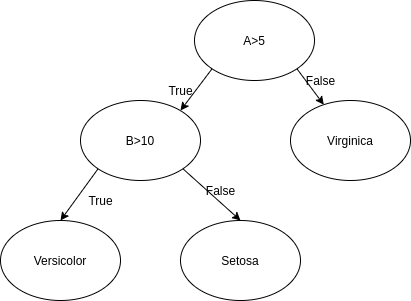
```
Is A>5?
True Branch
  Is B>10?
  True Branch
    Versicolor
  Is B>10?
  False Branch
    Setosa
Is A>5?
False Branch
	Virginica

```




In [ ]:
#using Ginni index
import numpy as np
from collections import Counter
def cal(sot):
  sum = 0
  for value in sot:
    if value > 0:
      sum = sum - (value**2)
  return 1+sum    

def ginniindex(Y):
  tot = np.bincount(Y)
  sot = tot/len(Y)
  sum = cal(sot)
  return sum    
class Node:
  def __init__(self,feature = None,threshold = None,left = None,right = None,*,value = None):
      setvalue = 0
      if(setvalue == 0):
       self.feature = feature
      if(setvalue == 0): 
       self.threshold = threshold
      if(setvalue == 0): 
       self.left = left
      if(setvalue == 0): 
       self.right = right
       self.value = value
  def isleaf1(self):
    return self.value is not None    
  def isleaf(self):
      return self.isleaf1()
      #return self.value is not None
class Decision_Tree:
  def __init__(self,minsamsplit=2,maxdepth = 200,n_features = None):
    stag = 0
    if stag == 0:
     self.minsamsplit = minsamsplit
    if stag == 0:
     self.maxdepth = maxdepth
    if stag == 0:
     self.n_features = n_features
     self.root = None
  def fitting(self,X_train,Y_train):
    if self.n_features is None:
      self.n_features = X_train.shape[1]
    else:
      self.n_features = min(self.n_features,X_train.shape[1])  
    self.root = self.grow(X_train,Y_train)           
  def grow(self,X_train,Y_train,depth=0):
    flag = 0
    n_samples,n_feature = X_train.shape
    n_labels = len(np.unique(Y_train))
    if depth >= self.maxdepth :
      leaf_value = self.mostcommonlable(Y_train)
      return Node(value = leaf_value)
    elif n_labels == 1:
      leaf_value = self.mostcommonlable(Y_train)
      return Node(value = leaf_value)
    elif n_samples < self.minsamsplit:
      leaf_value = self.mostcommonlable(Y_train)
      return Node(value = leaf_value)
    else: 
       if flag == 0:
         featureindexes = np.random.choice(n_feature,self.n_features,replace = False)
       if flag == 0:     
         bestfeature,bestthreshold = self.bestcriteria(X_train,Y_train,featureindexes)
         print( "IS"+ " "+ str(headers[bestfeature+1])+" "+ "<=" + str(bestthreshold))
         print("True")
         print("                 "+ "IS"+ " "+ str(headers[bestfeature+1])+" "+ "<=" + str(bestthreshold))
         print("                  False")
       if flag == 0:
         left_indices,right_indices = self.split(X_train[:,bestfeature],bestthreshold)
       if flag == 0:
         left = self.grow(X_train[left_indices,:],Y_train[left_indices],depth+1)
       if flag == 0:
         right = self.grow(X_train[right_indices,:],Y_train[right_indices],depth+1)
    return Node(bestfeature,bestthreshold,left,right)
  def newvalues(self,gain,values,thresholds):
    bestgain = gain
    splitindex = values
    splitthreshold = thresholds
    return bestgain,splitindex,splitthreshold  
  def bestcriteria(self,X_train,Y_train,featureindexes):
    bestgain = -1
    splitindex,splitthreshold = None,None
    j = 0
    while(j<len(featureindexes)):
      values = featureindexes[j]
      Xcol = X_train[:,values]
      thres = np.unique(Xcol) 
      i = 0
      while(i<len(thres)):
        thresholds = thres[i]
        gain = self.informationgain(Y_train,Xcol,thresholds)
        if(gain>bestgain):
          bestgain,splitindex,splitthreshold = self.newvalues(gain,values,thresholds)
          #bestgain = gain
          #splitindex = values
          #splitthreshold = thresholds
        i = i+1  
      j = j+1   
    return splitindex,splitthreshold   
  def calent(self,lengthleft,lengthright,eleft,eright,length):
    childentropy = (lengthleft/length)*eleft + (lengthright/length)*eright  
    return childentropy

  def informationgain(self,Y_train,X,splitthresh):
    parententropy = ginniindex(Y_train)
    childentropy = 0
    leftindices,rightindices = self.split(X,splitthresh)
    if(len(leftindices) == 0):
      return 0
    elif(len(rightindices) == 0):
      return 0
    else:
          length = len(Y_train)
          lengthleft = len(leftindices)
          lengthright = len(rightindices)
          eleft = ginniindex(Y_train[leftindices])
          eright = ginniindex(Y_train[rightindices])
          childentropy = self.calent(lengthleft,lengthright,eleft,eright,length)
    ig = parententropy - childentropy
    return ig
  def splitleft(self,X,splitthresh):
    leftindices = np.argwhere(X <= splitthresh).flatten()
    return leftindices
  def splitright(self,X,splitthresh):
    rightindices = np.argwhere(X>splitthresh).flatten()
    return rightindices 
  def split(self,X,splitthresh):
    leftindices = self.splitleft(X,splitthresh)
    rightindices = self.splitright(X,splitthresh)
    return leftindices,rightindices
  def cal (self,counter):
    most_common = counter.most_common(1)[0][0]
    return most_common  
  def mostcommonlable(self,Y_train):
    counter = Counter(Y_train)
    most_common = self.cal(counter)
    #most_common = counter.most_common(1)[0][0]
    return most_common 
  def predict1(self,X_train):
   return np.array([self.traversetree(values,self.root) for values in X_train ])   
  def predict(self,X_train):
    return self.predict1(X_train)
  def traverseleft(self,x,node): 
    return self.traversetree(x,node.left)
  def traverseright(self,x,node):
    return self.traversetree(x,node.right)   
  def traversetree(self,x,node):
    if node.isleaf():
      return node.value
    if ((x[node.feature]) <= node.threshold):
      return self.traverseleft(x,node)
    else:
      return self.traverseright(x,node)   

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy
X=data.iloc[:, :-1].values
Y=data.iloc[:, 10].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=45)
#print(len(X_train))
#print(len(y_train))
#for i in range(0,31):
classifier = Decision_Tree(maxdepth = 5)
classifier.fitting(X_train, y_train)
    
y_pred = classifier.predict(X_test)
acc = accuracy(y_test, y_pred)

#print ("Accuracy:", acc)


IS UCShape <=3.0
True
                 IS UCShape <=3.0
                  False
IS BC <=5.0
True
                 IS BC <=5.0
                  False
IS UCSize <=6.0
True
                 IS UCSize <=6.0
                  False
IS Mitoses <=8.0
True
                 IS Mitoses <=8.0
                  False
IS BC <=2.0
True
                 IS BC <=2.0
                  False
IS BN <=2.0
True
                 IS BN <=2.0
                  False
IS NN <=3.0
True
                 IS NN <=3.0
                  False
IS Diagnosis <=1.0
True
                 IS Diagnosis <=1.0
                  False
IS SECSize <=4.0
True
                 IS SECSize <=4.0
                  False
IS UCShape <=4.0
True
                 IS UCShape <=4.0
                  False
IS UCSize <=5.0
True
                 IS UCSize <=5.0
                  False
IS SECSize <=5.0
True
                 IS SECSize <=5.0
                  False
IS CT <=1125035.0
True
                 IS CT <=1125035.0
                  Fals

4. Experiment with removing features that are redundant, highly correlated with other features and report accuracies of the resulting model. Explain your approach.

In [ ]:
data.corr(method = 'kendall')

,ID,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
ID,1.000000,-0.002890,-0.032914,-0.044016,-0.038018,-0.064574,-0.077584,-0.068488,-0.053726,-0.059161,-0.086213
CT,-0.002890,1.000000,0.536527,0.534168,0.433447,0.470035,0.464413,0.417864,0.462330,0.353145,0.593306
UCSize,-0.032914,0.536527,1.000000,0.814805,0.639617,0.681967,0.630302,0.599490,0.663477,0.455333,0.778374
UCShape,-0.044016,0.534168,0.814805,1.000000,0.605153,0.650150,0.602244,0.571532,0.628145,0.418632,0.753993
MA,-0.038018,0.433447,0.639617,0.605153,1.000000,0.570872,0.596002,0.511487,0.547012,0.400285,0.667469
SECSize,-0.064574,0.470035,0.681967,0.650150,0.570872,1.000000,0.579473,0.522013,0.608636,0.431205,0.695242
BN,-0.077584,0.464413,0.630302,0.602244,0.596002,0.579473,1.000000,0.534338,0.540201,0.422038,0.752538
BC,-0.068488,0.417864,0.599490,0.571532,0.511487,0.522013,0.534338,1.000000,0.561403,0.333247,0.654153
NN,-0.053726,0.462330,0.663477,0.628145,0.547012,0.608636,0.540201,0.561403,1.000000,0.453633,0.688275
Mitoses,-0.059161,0.353145,0.455333,0.418632,0.400285,0.431205,0.422038,0.333247,0.453633,1.000000,0.508987


In [ ]:
#as we can see the most correlated data are BC and BN hence we make decision tree avoiding those features

In [2]:
data = data[['ID','CT','UCSize','UCShape','MA','SECSize','NN','Mitoses','Diagnosis']]
data

,ID,CT,UCSize,UCShape,MA,SECSize,NN,Mitoses,Diagnosis
0,1000025,5,1,1,1,2,1,1,2
1,1002945,5,4,4,5,7,2,1,2
2,1015425,3,1,1,1,2,1,1,2
3,1016277,6,8,8,1,3,7,1,2
4,1017023,4,1,1,3,2,1,1,2
...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,1,1,2
695,841769,2,1,1,1,2,1,1,2
696,888820,5,10,10,3,7,10,2,4
697,897471,4,8,6,4,3,6,1,4


In [3]:
import numpy as np
from collections import Counter
def calculate(sot):
  sum = 0
  for value in sot:
    if value>0:
      sum = sum - (value*np.log2(value))
  return sum  
def entropyvalue(Y):
  tot = np.bincount(Y)
  sot = tot/len(Y)
  sum = 0
  sum = calculate(sot)
  return sum
    
class Node:
  def __init__(self,feature = None,threshold = None,left = None,right = None,*,value = None):
      setflag = 0
      if(setflag == 0):
       self.feature = feature
      if(setflag == 0):
       self.threshold = threshold
      if(setflag == 0): 
       self.left = left
      if(setflag == 0): 
       self.right = right
       self.value = value
  def isleaf1(self):
    return self.value is not None    
  def isleaf(self):
      return self.isleaf1()
      #return self.value is not None
class Decision_Tree:
  def __init__(self,minsamsplit=2,maxdepth = 200,n_features = None):
    stag = 0
    if stag == 0:
     self.minsamsplit = minsamsplit
    self.maxdepth = maxdepth
    self.n_features = n_features
    self.root = None
  def fitting(self,X_train,Y_train):
    if self.n_features is None:
      self.n_features = X_train.shape[1]
    else:
      self.n_features = min(self.n_features,X_train.shape[1])  
    self.root = self.grow(X_train,Y_train)           
  def grow(self,X_train,Y_train,depth=0):
    flag = 0
    n_samples,n_feature = X_train.shape
    n_labels = len(np.unique(Y_train))
    if depth >= self.maxdepth :
      leaf_value = self.mostcommonlable(Y_train)
      return Node(value = leaf_value)
    elif n_labels == 1:
      leaf_value = self.mostcommonlable(Y_train)
      return Node(value = leaf_value)
    elif n_samples < self.minsamsplit:
      leaf_value = self.mostcommonlable(Y_train)
      return Node(value = leaf_value)
    else: 
      if(flag == 0): 
        featureindexes = np.random.choice(n_feature,self.n_features,replace = False)
      if(flag == 0):  
        bestfeature,bestthreshold = self.bestcriteria(X_train,Y_train,featureindexes)
      if(flag == 0):  
        left_indices,right_indices = self.split(X_train[:,bestfeature],bestthreshold)
      if(flag == 0):  
        left = self.grow(X_train[left_indices,:],Y_train[left_indices],depth+1)
      if(flag == 0):  
        right = self.grow(X_train[right_indices,:],Y_train[right_indices],depth+1)
    return Node(bestfeature,bestthreshold,left,right)
  def newvalues(self,gain,values,thresholds):
    bestgain = gain
    splitindex = values
    splitthreshold = thresholds
    return bestgain,splitindex,splitthreshold  
  def bestcriteria(self,X_train,Y_train,featureindexes):
    bestgain = -1
    splitindex,splitthreshold = None,None
    j = 0
    while(j<len(featureindexes)):
    #for values in featureindexes:
      values = featureindexes[j]
      Xcol = X_train[:,values]
      thres = np.unique(Xcol) 
      i = 0
      while(i<len(thres)):
        thresholds = thres[i]
        gain = self.informationgain(Y_train,Xcol,thresholds)
        if(gain>bestgain):
          bestgain,splitindex,splitthreshold = self.newvalues(gain,values,thresholds)
          #bestgain = gain
          #splitindex = values
          #splitthreshold = thresholds
        i = i+1
      j = j+1    
    return splitindex,splitthreshold   
  def calent(self,lengthleft,lengthright,eleft,eright,length):
    childentropy = (lengthleft/length)*eleft + (lengthright/length)*eright  
    return childentropy

  def informationgain(self,Y_train,X,splitthresh):
    parententropy = entropyvalue(Y_train)
    childentropy = 0
    leftindices,rightindices = self.split(X,splitthresh)
    if(len(leftindices) == 0):
      return 0
    elif(len(rightindices) == 0):
      return 0
    else:
          length = len(Y_train)
          lengthleft = len(leftindices)
          lengthright = len(rightindices)
          eleft = entropyvalue(Y_train[leftindices])
          eright = entropyvalue(Y_train[rightindices])
          childentropy = self.calent(lengthleft,lengthright,eleft,eright,length)
    ig = parententropy - childentropy
    return ig
  def splitleft(self,X,splitthresh):
    leftindices = np.argwhere(X <= splitthresh).flatten()
    return leftindices
  def splitright(self,X,splitthresh):
    rightindices = np.argwhere(X>splitthresh).flatten()
    return rightindices 
  def split(self,X,splitthresh):
    leftindices = self.splitleft(X,splitthresh)
    rightindices = self.splitright(X,splitthresh)
    return leftindices,rightindices
  def cal (self,counter):
    most_common = counter.most_common(1)[0][0]
    return most_common  
  def mostcommonlable(self,Y_train):
    counter = Counter(Y_train)
    most_common = self.cal(counter)
    #most_common = counter.most_common(1)[0][0]
    return most_common 
  def predict1(self,X_train):
   return np.array([self.traversetree(values,self.root) for values in X_train ])   
  def predict(self,X_train):
    return self.predict1(X_train)
  def traverseleft(self,x,node): 
    return self.traversetree(x,node.left)
  def traverseright(self,x,node):
    return self.traversetree(x,node.right)   
  def traversetree(self,x,node):
    if node.isleaf():
      return node.value
    if ((x[node.feature]) <= node.threshold):
      return self.traverseleft(x,node)
    else:
      return self.traverseright(x,node)      

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy
X=data.iloc[:, :-1].values
Y=data.iloc[:, 8].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
print(len(X_train))
print(len(y_train))

classifier = Decision_Tree(maxdepth = 7)
classifier.fitting(X_train, y_train)
    
y_pred = classifier.predict(X_test)
acc = accuracy(y_test, y_pred)

print ("Accuracy:", acc)

559
559
Accuracy: 0.9285714285714286


In [ ]:
#AS we can see on removing the most corelated data there is change in the accuracy of the decision tree and the accuracy goes down

5. Report the advantages and disadvantages of decision trees based on the above question.

Advantage:
*   Decision tree does not require normalization of data
*   Decision tree does not require scaling of data
*   Missing data does not affect the building of the decision tree.

Disadvantage:
*   A small change in the data can lead to the change in the whole structure of
    decision tree
*   They can only classify but cannot predict any values like knn or linear
    regression.




